# üè° Aprendizado n√£o supervisionado

## Descri√ß√£o

Para atender as necessidades de um leque de decis√µes financeiras, o Banco Santander oferece sugest√µes de produtos de interesse aos seus clientes por meio de recomenda√ß√µes personalizadas de produtos.

Atualmente, um pequeno n√∫mero de clientes recebe muitas recomenda√ß√µes, enquanto uma quantidade maior de clientes raramente recebe as recomenda√ß√µes. Isso resulta em uma experi√™ncia desigual para os clientes.

Existem diferentes abordagens e an√°lises que podem ser feitas para entender melhor as necessidades dos clientes. Com um sistema de recomenda√ß√£o mais eficaz, o Santander pode atender melhor √†s necessidades individuais de todos os clientes e garantir sua satisfa√ß√£o.

Para essa atividade, focaremos na identifica√ß√£o de clientes com comportamentos e caracter√≠sticas semelhantes utilizando um conjunto de dados disponibilizado na competi√ß√£o Santander Product Recommendation (https://www.kaggle.com/c/santander-product-recommendation/). Note que os requisitos dessa atividade s√£o diferentes dos enunciados na competi√ß√£o original.

Nessa atividade, √© fornecida 1 ano e 5 meses de dados de comportamento dos clientes do banco Santander. Os dados come√ßam em 28/01/2015 e t√™m registros mensais de produtos que um cliente possui, como "cart√£o de cr√©dito", "conta poupan√ßa", etc. A √∫ltima informa√ß√£o √© referente a data de 28/05/2016. Esses produtos s√£o as colunas nomeadas: ind_(xyz)_ult1, que s√£o as colunas 25-48 nos dados de treinamento.

O conjunto de dados utilizado n√£o inclui nenhum cliente real do Santander Espanha e, portanto, n√£o √© representativo da base de clientes da Espanha. A tarefa √© entender os diferentes perfis de clientes e de produtos que existem na base de dados.

Apenas o conjunto de treinamento ser√° utilizado nesta atividade. Considere a experi√™ncia adquirida na Atividade 1 e os outros conte√∫dos passados na disciplina para:

- Explorar as vari√°veis dispon√≠veis no conjunto de dados, usando ferramentas apresentadas em aula;
- Pr√©-processar adequadamente os dados.
- Realizar o agrupamento dos clientes, usando os algoritmos KMeans e DBSCAN;
- Validar os agrupamentos gerados como resultado da tarefa utilizando medidas internas dos dados dispon√≠veis;
- Descrever de forma manual ou automatizada ao menos 2 agrupamentos de clientes.

Isto √©, ap√≥s segmentar os clientes em diferentes perfis, tente analisar e descrever (textualmente) o comportamento de (pelo menos) 2 grupos distintos.

Exemplo: selecione os clientes que pertencem a algum cluster encontrado e busque entender o comportamento das vari√°veis para este cluster. Como elas diferem do comportamento geral ou do comportamento em outros clusters?

## Instru√ß√µes para acesso aos dados

Os dados est√£o dispon√≠veis na plataforma Kaggle em https://www.kaggle.com/c/santander-product-recommendation/data

Para acess√°-los, ser√° necess√°rio criar uma conta na plataforma. Na p√°gina da competi√ß√£o tamb√©m ser√° necess√°rio concordar os termos dispostos.

Nesta atividade, √© suficiente utilizar o arquivo train_ver2.csv.zip. O arquivo pode ser baixado diretamente pela interface web. Uma alternativa √© utilizar a linha de comando do Kaggle, √∫til por exemplo caso voc√™ v√° utilizar o Google Colab. Para isso:

1. Obtenha o arquivo kaggle.json seguindo as instru√ß√µes em https://github.com/Kaggle/kaggle-api#api-credentials.
2. Fa√ßa o upload no arquivo no Colab:
3. Utilize o notebook a seguir como base: https://colab.research.google.com/drive/1UiZ1EXeJDkGJaCFFd4untMQ5dqywL8hU?usp=sharing

Para simplificar, iremos utilizar apenas um subconjunto dos dados, referente ao m√™s 05/2016. O notebook de exemplo tamb√©m mostra como gerar esse subconjunto de dados.

## Orienta√ß√µes gerais:

- C√≥digos p√∫blicos podem ser utilizados como inspira√ß√£o para o desenvolvimento da atividade, mas todo material gerado deve ser de autoria do aluno ou possuir refer√™ncia.
- A qualidade dos resultados finais em si √© menos importante do que a coer√™ncia durante as an√°lises e as abordagens exploradas.
- N√£o √© necess√°rio fazer nenhum tipo de predi√ß√£o.
- A tarefa deve ser entregue no formato .ipynb, que deve conter documenta√ß√£o detalhada de todas as etapas.
- Entregar (no ava-iti ‚Äì tarefa de arquivo √∫nico) com o arquivo no formato especificado acima.


# ‚öôÔ∏è Setup

## Depend√™ncias

In [1]:
# Instala√ß√£o das depend√™ncias
%pip install rich
%pip install requests

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Bibliotecas de uso geral
from __future__ import annotations
from typing import Callable

from itertools import cycle

from dataclasses import dataclass
from dataclasses import field

from datetime import datetime
from pprint import pprint

import requests
import tarfile
import pickle
import os
import multiprocessing
import string

In [3]:
# Biblioteca para formata√ß√£o do console
from rich.console import Console
from rich.table import Table
from rich.progress import track
console = Console()

In [4]:
# Biblioteca de manipula√ß√£o de dados
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 36)

In [5]:
# Biblitecas de aprendizado de m√°quina
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import normalize

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans

from sklearn.metrics import silhouette_score
from sklearn.manifold import Isomap 
from sklearn import metrics

In [6]:
# Biblioteca de visualiza√ß√£o do KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [7]:
# Bibliotecas para gr√°ficos
import matplotlib.pyplot as plt
import matplotlib as mpl

# Corrige o modo de visualiza√ß√£o das imagens
%config InlineBackend.figure_format = 'svg'

# Formata√ß√£o das figuras
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['savefig.dpi'] = 600

# Formata√ß√£o dos textos
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 9
mpl.rcParams['legend.fontsize'] = 'medium'

mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize'] = 'x-large'

mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.titlesize'] = 'large'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.axisbelow'] = True

mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

mpl.rcParams['grid.color'] = '#E0E0E0'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = 0.8
mpl.rcParams['grid.alpha'] = 0.8

# Redefine a lista padr√£o de cores
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#293462', '#0083af','#1CD6CE', '#82e484',
                                                    '#FEDB39', '#fe8132', '#D61C4E', '#862e77',]) 

## Classes Auxiliares

In [8]:
class Plot:
    """Classe wrapper para padronizar as fun√ß√µes mais comuns do matplotlib.
    """
    
    @staticmethod
    def subplots(nrows=1, ncols=1):
        return plt.subplots(nrows, ncols, figsize=(min(6.0 * ncols, 12.0), min(12.0 / ncols, 4.0) * nrows), layout='tight')

    @staticmethod
    def mosaic(grid):
        ncols = len(grid[0])
        nrows = len(grid)
        return plt.subplot_mosaic(grid, figsize=(min(6.0 * ncols, 12.0), min(12.0 / ncols, 4.0) * nrows), layout='constrained')
    
    @staticmethod
    def show(nrows=1, ncols=1):
        plt.tight_layout(w_pad=3, h_pad=3)
        
    @staticmethod
    def colors():
        return cycle([f'C{i}' for i in range(8)])

In [9]:
class DataAnalysis:
    
    @staticmethod
    def print_summary(df: pd.DataFrame, filtro: str = None):
        """Imprime um resumo com os tipos de dados e amostra dos valores categ√≥ricos.
        """
        dtypes = {
            'int': ['uint8', 'int8', 'int16', 'int32', 'int64'],
            'float': ['float64'],
            'bool': ['bool'],
            'category': ['category'],
        }

        for tipo, dtype in dtypes.items():
            if filtro and tipo != filtro: 
                continue
                
            rows = []
            for dt in dtype:
                serie = pd.Series({col: df[col] for col in df.select_dtypes(include=[dt])}, dtype='object')
                for k, v in serie.items():
                    unicos = v.nunique()
                    nulos_abs = len(v[v.isna()])
                    nulos_per = len(v[v.isna()]) / len(df) * 100

                    if tipo in ('int', 'float'):
                        rows.append((dt, str(k), f'({v.min()}, {v.max()})', f'{unicos}', f'{nulos_abs}', f'{nulos_per:.2f}%'))
                    elif tipo == 'bool':
                        rows.append((dt, str(k), f'{v.unique()}', f'{unicos}', f'{nulos_abs}', f'{nulos_per:.2f}%'))
                    else:
                        rows.append((dt, str(k), f'{v.unique().to_list()[:8]}', f'{unicos}', f'{nulos_abs}', f'{nulos_per:.2f}%'))


            if not rows:
                continue

            table = Table(show_header=True, header_style="bold", title=f'Tipo: {tipo}') 
            table.add_column("Tipo", style="dim", width=12)
            table.add_column("Atributo", style="green", width=24)
            table.add_column("Dom√≠nio", no_wrap=True, width=60)
            table.add_column("√önicos",  style='blue', width=12)
            table.add_column("Nulos",  style='red', width=12)
            table.add_column("Nulos%",  style='yellow', width=12)

            for r in rows:
                table.add_row(*r)

            console.print(table)  

# üóÑ Conjunto de dados

## Descri√ß√£o

Descri√ß√£o de todos os atributos do conjunto de dados.

| **Atributo**               | **Descri√ß√£o** |
|:---------------------------|:--------------|
| **fecha_dato**             | The table is partitioned for this column |
| **ncodpers**               | Customer code |
| **ind_empleado**           | Employee index                       A active, B ex employed, F filial, N not employee, P pasive |
| **pais_residencia**        | Customer's Country residence |
| **sexo**                   | Customer's sex |
| **age**                    | Age |
| **fecha_alta**             | The date in which the customer became as the first holder of a contract in the bank |
| **ind_nuevo**              | New customer Index. 1 if the customer registered in the last 6 months. |
| **antiguedad**             | Customer seniority (in months) |
| **indrel**                 | 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month) |
| **ult_fec_cli_1t**         | Last date as primary customer (if he isn't at the end of the month) |
| **indrel_1mes**            | Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner) |
| **tiprel_1mes**            | Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential) |
| **indresi**                | Residence index (S (Yes) or N (No) if the residence country is the same than the bank country) |
| **indext**                 | Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country) |
| **conyuemp**               | Spouse index. 1 if the customer is spouse of an employee |
| **canal_entrada**          | channel used by the customer to join |
| **indfall**                | Deceased index. N/S |
| **tipodom**                | Addres type. 1, primary address |
| **cod_prov**               | Province code (customer's address) |
| **nomprov**                | Province name |
| **ind_actividad_cliente**  | Activity index (1, active customer; 0, inactive customer) |
| **renta**                  | Gross income of the household |
| **segmento**               | segmentation 01 - VIP, 02 - Individuals 03 - college graduated |
| **ind_ahor_fin_ult1**      | Saving Account |
| **ind_aval_fin_ult1**      | Guarantees |
| **ind_cco_fin_ult1**       | Current Accounts |
| **ind_cder_fin_ult1**      | Derivada Account |
| **ind_cno_fin_ult1**       | Payroll Account |
| **ind_ctju_fin_ult1**      | Junior Account |
| **ind_ctma_fin_ult1**      | M√°s particular Account |
| **ind_ctop_fin_ult1**      | particular Account |
| **ind_ctpp_fin_ult1**      | particular Plus Account |
| **ind_deco_fin_ult1**      | Short-term deposits |
| **ind_deme_fin_ult1**      | Medium-term deposits |
| **ind_dela_fin_ult1**      | Long-term deposits |
| **ind_ecue_fin_ult1**      | e-account |
| **ind_fond_fin_ult1**      | Funds |
| **ind_hip_fin_ult1**       | Mortgage |
| **ind_plan_fin_ult1**      | Pensions |
| **ind_pres_fin_ult1**      | Loans |
| **ind_reca_fin_ult1**      | Taxes |
| **ind_tjcr_fin_ult1**      | Credit Card |
| **ind_valo_fin_ult1**      | Securities |
| **ind_viv_fin_ult1**       | Home Account |
| **ind_nomina_ult1**        | Payroll |
| **ind_nom_pens_ult1**      | Pensions |
| **ind_recibo_ult1**        | Direct Debit |

O conjunto de dados √© muito grande e n√£o est√° otimizado. Por isso, ser√° feita uma an√°lise inicial de todos os atributos e o tipo de dados mais adequado em cada um dos casos.

In [10]:
# Caminho do dataset
URL='https://github.com/chaua/mba-machine-learning/blob/main/iml2/atividade2/data_05-2016.tgz?raw=true'

response = requests.get(URL, stream=True)
file = tarfile.open(fileobj=response.raw, mode="r|gz")
file.extractall(path='/tmp')

In [11]:
# Carrega todo o dataset original
#df = pd.read_csv('./data_05-2016.csv', low_memory=False)
#df.info(memory_usage="deep")

#> memory usage: 1000.8 MB

In [12]:
# Carrega uma parte do dataset correspondente ao per√≠odo 05-2016
df = pd.read_csv('/tmp/data_05-2016.csv', nrows=1000)
df.shape

(1000, 48)

In [13]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_dato             1000 non-null   object 
 1   ncodpers               1000 non-null   int64  
 2   ind_empleado           1000 non-null   object 
 3   pais_residencia        1000 non-null   object 
 4   sexo                   1000 non-null   object 
 5   age                    1000 non-null   int64  
 6   fecha_alta             1000 non-null   object 
 7   ind_nuevo              1000 non-null   float64
 8   antiguedad             1000 non-null   int64  
 9   indrel                 1000 non-null   float64
 10  ult_fec_cli_1t         0 non-null      float64
 11  indrel_1mes            1000 non-null   object 
 12  tiprel_1mes            1000 non-null   object 
 13  indresi                1000 non-null   object 
 14  indext                 1000 non-null   object 
 15  conyu

In [14]:
df.head()

fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2016-05-28    657640            N              ES    H   68  2006-11-17   
1  2016-05-28    657788            N              ES    H   42  2006-11-18   
2  2016-05-28    657795            N              ES    V   44  2006-11-18   
3  2016-05-28    657790            N              ES    V   42  2006-11-18   
4  2016-05-28    657794            N              ES    H   49  2006-11-18   

   ind_nuevo  antiguedad  indrel  ult_fec_cli_1t indrel_1mes tiprel_1mes  \
0        0.0         114     1.0             NaN           1           I   
1        0.0         114     1.0             NaN           1           A   
2        0.0         114     1.0             NaN           1           A   
3        0.0         114     1.0             NaN           1           A   
4        0.0         114     1.0             NaN           1           A   

  indresi indext  conyuemp canal_entrada indfall  tipodom  cod_prov  \
0       S      N       NaN           KAQ       N      1.0      28.0   
1       S      N       NaN           KBF       N      1.0      28.0   
2       S      N       NaN           KAP       N      1.0      26.0   
3       S      N       NaN           KBF       N      1.0      48.0   
4       S      N       NaN           KAT       N      1.0       8.0   

     nomprov  ind_actividad_cliente      renta           segmento  \
0     MADRID                    0.0  147347.97  02 - PARTICULARES   
1     MADRID                    1.0  132559.35  02 - PARTICULARES   
2  RIOJA, LA                    1.0   81399.57  02 - PARTICULARES   
3    BIZKAIA                    1.0        NaN  02 - PARTICULARES   
4  BARCELONA                    1.0  102189.00           01 - TOP   

   ind_ahor_fin_ult1  ind_aval_fin_ult1  ind_cco_fin_ult1  ind_cder_fin_ult1  \
0                  0                  0                 0                  0   
1                  0                  0                 1                  0   
2                  0                  0                 1                  0   
3                  0                  0                 0                  0   
4                  0                  0                 1                  0   

   ind_cno_fin_ult1  ind_ctju_fin_ult1  ind_ctma_fin_ult1  ind_ctop_fin_ult1  \
0                 0                  0                  0                  0   
1                 0                  0                  0                  0   
2                 0                  0                  0                  0   
3                 1                  0                  0                  0   
4                 0                  0                  0                  0   

   ind_ctpp_fin_ult1  ind_deco_fin_ult1  ind_deme_fin_ult1  ind_dela_fin_ult1  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  1   

   ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_hip_fin_ult1  ind_plan_fin_ult1  \
0                  0                  0                 0                  0   
1                  0                  0                 0                  0   
2                  0                  0                 0                  0   
3                  1                  0                 0                  0   
4                  0                  0                 0                  0   

   ind_pres_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  ind_valo_fin_ult1  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0    

Mapeamento dos tipos de dados de cada um dos atributos:

```
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_dato             1000 non-null   object  --> Valor constante para o dom√≠nio do problema (EXCLUIR) 
 1   ncodpers               1000 non-null   int32   --> Identificador do cliente
 2   ind_empleado           1000 non-null   object  --> category
 3   pais_residencia        1000 non-null   object  --> category
 4   sexo                   1000 non-null   object  --> category
 5   age                    1000 non-null   int64   --> int16
 6   fecha_alta             1000 non-null   object  --> datetime64
 7   ind_nuevo              1000 non-null   float64 --> bool
 8   antiguedad             1000 non-null   int64   --> int32
 9   indrel                 1000 non-null   float64 --> int8
 10  ult_fec_cli_1t         0 non-null      float64 --> datetime64 (?)
 11  indrel_1mes            1000 non-null   object  --> int8
 12  tiprel_1mes            1000 non-null   object  --> category
 13  indresi                1000 non-null   object  --> category
 14  indext                 1000 non-null   object  --> category
 15  conyuemp               0 non-null      float64 --> bool
 16  canal_entrada          997 non-null    object  --> category
 17  indfall                1000 non-null   object  --> category 
 18  tipodom                1000 non-null   float64 --> bool
 19  cod_prov               990 non-null    float64 --> int8
 20  nomprov                990 non-null    object  --> str
 21  ind_actividad_cliente  1000 non-null   float64 --> bool
 22  renta                  831 non-null    float64 --> float64
 23  segmento               997 non-null    object  --> category
 24  ind_ahor_fin_ult1      1000 non-null   int64   --> bool
 25  ind_aval_fin_ult1      1000 non-null   int64   --> bool
 26  ind_cco_fin_ult1       1000 non-null   int64   --> bool
 27  ind_cder_fin_ult1      1000 non-null   int64   --> bool
 28  ind_cno_fin_ult1       1000 non-null   int64   --> bool
 29  ind_ctju_fin_ult1      1000 non-null   int64   --> bool
 30  ind_ctma_fin_ult1      1000 non-null   int64   --> bool
 31  ind_ctop_fin_ult1      1000 non-null   int64   --> bool
 32  ind_ctpp_fin_ult1      1000 non-null   int64   --> bool
 33  ind_deco_fin_ult1      1000 non-null   int64   --> bool
 34  ind_deme_fin_ult1      1000 non-null   int64   --> bool
 35  ind_dela_fin_ult1      1000 non-null   int64   --> bool
 36  ind_ecue_fin_ult1      1000 non-null   int64   --> bool
 37  ind_fond_fin_ult1      1000 non-null   int64   --> bool
 38  ind_hip_fin_ult1       1000 non-null   int64   --> bool
 39  ind_plan_fin_ult1      1000 non-null   int64   --> bool
 40  ind_pres_fin_ult1      1000 non-null   int64   --> bool
 41  ind_reca_fin_ult1      1000 non-null   int64   --> bool
 42  ind_tjcr_fin_ult1      1000 non-null   int64   --> bool
 43  ind_valo_fin_ult1      1000 non-null   int64   --> bool
 44  ind_viv_fin_ult1       1000 non-null   int64   --> bool
 45  ind_nomina_ult1        1000 non-null   float64 --> bool
 46  ind_nom_pens_ult1      1000 non-null   float64 --> bool
 47  ind_recibo_ult1        1000 non-null   int64   --> bool
```

In [15]:
# Nova defini√ß√£o dos tipos de dados de todos os atributos
dtypes = {
    'ncodpers'              : 'int32',   
    'ind_empleado'          : 'category',
    'pais_residencia'       : 'category',
    'sexo'                  : 'category',
    'age'                   : 'int16',
    'ind_nuevo'             : 'bool',
    'antiguedad'            : 'int32',
    'indrel'                : 'int8',
    'indrel_1mes'           : 'category',
    'tiprel_1mes'           : 'category',
    'indresi'               : 'category',
    'indext'                : 'category',
    'canal_entrada'         : 'category',
    'indfall'               : 'category',
    'tipodom'               : 'bool',
    'nomprov'               : 'category',
    'ind_actividad_cliente' : 'bool',
    'renta'                 : 'float64',
    'segmento'              : 'category',
    'ind_ahor_fin_ult1'     : 'bool',
    'ind_aval_fin_ult1'     : 'bool',
    'ind_cco_fin_ult1'      : 'bool',
    'ind_cder_fin_ult1'     : 'bool',
    'ind_cno_fin_ult1'      : 'bool',
    'ind_ctju_fin_ult1'     : 'bool',
    'ind_ctma_fin_ult1'     : 'bool',
    'ind_ctop_fin_ult1'     : 'bool',
    'ind_ctpp_fin_ult1'     : 'bool',
    'ind_deco_fin_ult1'     : 'bool',
    'ind_deme_fin_ult1'     : 'bool',
    'ind_dela_fin_ult1'     : 'bool',
    'ind_ecue_fin_ult1'     : 'bool',
    'ind_fond_fin_ult1'     : 'bool',
    'ind_hip_fin_ult1'      : 'bool',
    'ind_plan_fin_ult1'     : 'bool',
    'ind_pres_fin_ult1'     : 'bool',
    'ind_reca_fin_ult1'     : 'bool',
    'ind_tjcr_fin_ult1'     : 'bool',
    'ind_valo_fin_ult1'     : 'bool',
    'ind_viv_fin_ult1'      : 'bool',
    'ind_nomina_ult1'       : 'bool',
    'ind_nom_pens_ult1'     : 'bool',
    'ind_recibo_ult1'       : 'bool',
}

# Fun√ß√µes de convers√£o de tipos
# - Alguns atributos possuem tipos de dados misturados
# - Por isso, precisamos tratar a convers√£o dos dados manualmente
def to_bool(val):
    return bool(val)

def to_int(val):
    if isinstance(val, str) and not val:
        return 0
    return int(float(val))

converters = {
    'conyuemp'           : to_bool,
    'cod_prov'           : to_int,
}

In [16]:
# Carrega uma parte do dataset correspondente ao per√≠odo 05-2016
df = pd.read_csv('/tmp/data_05-2016.csv', 
                 dtype=dtypes, 
                 converters=converters, 
                 usecols=list(dtypes.keys()) + list(converters.keys()))
df.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931453 entries, 0 to 931452
Columns: 45 entries, ncodpers to ind_recibo_ult1
dtypes: bool(28), category(11), float64(1), int16(1), int32(2), int64(1), int8(1)
memory usage: 59.5 MB


‚ÑπÔ∏è Com a otimiza√ß√£o dos tipos dos dados, o tamanho do DataFrame reduziu de 1000.8 MB para 59.5 MB

## An√°lise - atributos inteiros

In [17]:
# Verifica o dom√≠nio de todos os atributos do conjunto de dados
DataAnalysis.print_summary(df, 'int')

                                                     Tipo: int                                                     
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Tipo   ‚îÉ Atributo           ‚îÉ Dom√≠nio                                                ‚îÉ √önicos ‚îÉ Nulos  ‚îÉ Nulos% ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ int8   ‚îÇ indrel             ‚îÇ (1, 99)                                                ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ int16  ‚îÇ age                ‚îÇ (2, 164)                                               ‚îÇ 118    ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ int32  ‚îÇ ncodpers           ‚îÇ (15889, 1553689)                                       ‚îÇ 931453 ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ int32  ‚îÇ antiguedad         ‚îÇ (-999999, 256)                                         ‚îÇ 258    ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ int64  ‚îÇ cod_prov           ‚îÇ (0, 52)                                                ‚îÇ 53     ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

### `indrel`

In [18]:
df.indrel.value_counts(normalize=True).mul(100).round(1)

1     99.8
99     0.2
Name: indrel, dtype: float64

**Considera√ß√µes**

- O atributo √© categ√≥rico e est√° desbalanceado.
- Pode ser removido

### `age`

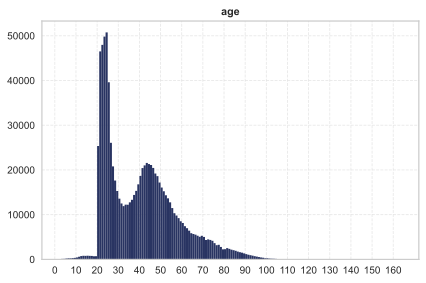

In [19]:
fig, ax = Plot.subplots()

ax.set_xticks(np.arange(0, 170, 10))
ax.set_title('age')

df.age.hist(ax=ax, bins=162)

Plot.show()

In [20]:
menores_18 = len(df.query('age < 18'))
maiores_90 = len(df.query('age > 90'))

console.print(f'Menores de 18...: {menores_18 / len(df) * 100:.2f}%')
console.print(f'Maiores de 90...: {maiores_90 / len(df) * 100:.2f}%')

Menores de 18...: 0.79%

Maiores de 90...: 0.75%

**Considera√ß√µes**

- Indiv√≠duos com menos de 18 anos e acima de 90 anos correspondem a 0,79% e 0,75% dos registros da base.
- Por n√£o serem economicamente ativos, podem ser exclu√≠dos para evitar que atuem como outliers.

### `ncodpers`

In [21]:
len(df) == len(df.ncodpers)

True

**Considera√ß√µes**

- Identificador √∫nico dos clientes. Pode ser utilizado como √≠ndice.

### `antiguedad`

In [22]:
df.antiguedad.value_counts(normalize=True).mul(100).sort_index()

-999999    0.000322
 0         0.502333
 1         0.447902
 2         0.493852
 3         0.665627
             ...   
 252       0.027162
 253       0.016211
 254       0.009126
 255       0.008267
 256       0.010951
Name: antiguedad, Length: 258, dtype: float64

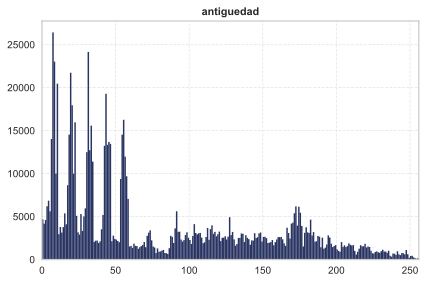

In [23]:
fig, ax = Plot.subplots()

ax.set_xticks(np.arange(0, 256, 50))
ax.set_xlim(0, 256)
ax.set_title('antiguedad')

df.query('antiguedad >= 0').antiguedad.hist(ax=ax, bins=256)

Plot.show()

**Considera√ß√µes**

- Indicador -999999 indica dados faltantes. Como a amostragem corresponde a 0,0003% da base, esses registros podem ser removidos.

### `cod_prov`

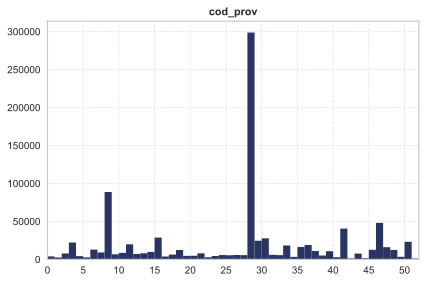

In [24]:
fig, ax = Plot.subplots()

ax.set_xticks(np.arange(0, 52, 5))
ax.set_xlim(0, 52)

ax.set_title('cod_prov')

df.cod_prov.hist(ax=ax, bins=52)

Plot.show()

In [25]:
df.cod_prov.value_counts(normalize=True).mul(100)

28    32.083315
8      9.528554
46     5.164297
41     4.356742
15     3.088830
        ...    
1      0.278812
44     0.165118
42     0.135380
52     0.068817
51     0.055075
Name: cod_prov, Length: 53, dtype: float64

**Considera√ß√µes**

- A cidade com ID 28 √© a que possui maior concentra√ß√£o das amostras: 32% da base
- O c√≥digo da prov√≠ncia est√° relacionado com o nome da prov√≠ncia. Umas das colunas pode ser ignorada

## An√°lise - atributos reais

In [26]:
# Verifica o dom√≠nio de todos os atributos do conjunto de dados
DataAnalysis.print_summary(df, 'float')

                                                    Tipo: float                                                    
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Tipo   ‚îÉ Atributo           ‚îÉ Dom√≠nio                                                ‚îÉ √önicos ‚îÉ Nulos  ‚îÉ Nulos% ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ float‚Ä¶ ‚îÇ renta              ‚îÇ (1202.73, 28894395.51)                                 ‚îÇ 516843 ‚îÇ 229018 ‚îÇ 24.59% ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

### `renta`

In [27]:
df.renta.describe().apply(lambda x: format(x, 'f'))

count      702435.000000
mean       134089.637098
std        232220.499611
min          1202.730000
25%         68493.795000
50%        101493.450000
75%        155546.355000
max      28894395.510000
Name: renta, dtype: object

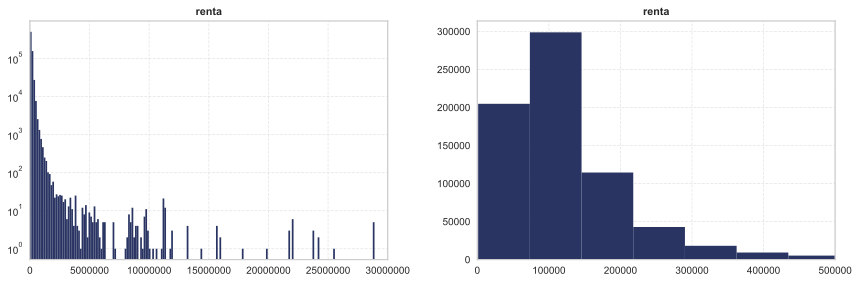

In [28]:
fig, (ax1, ax2) = Plot.subplots(nrows=1, ncols=2)

# Todos os clientes
ax1.set_xlim(0, 30_000_000)
ax1.ticklabel_format(useOffset=False, style='plain')
ax1.set_title('renta')

df.renta.hist(ax=ax1, bins=200, log=True)

# Clientes com renda normal
ax2.set_xlim(0, 500_000)
ax2.ticklabel_format(useOffset=False, style='plain')
ax2.set_title('renta')

df.renta.hist(ax=ax2, bins=400)

Plot.show()

In [29]:
clientes_ricos = len(df.query('renta > 250_000'))
console.print(f'Clientes ricos...: {clientes_ricos / len(df) * 100:.2f}%')

Clientes ricos...: 6.43%

In [30]:
# Verifica quais paises possuem renda 
df.query('renta.notna()').groupby('pais_residencia').agg('renta').median().isna().value_counts()

True     94
False    24
Name: renta, dtype: int64

**Considera√ß√µes**

- Maior concentra√ß√£o de clientes entre 68k e 156k.
- Os clientes com renda que varia de 250k at√© 30M correspondem a 6,4% da base.
- Embora sejam valores fora da curva, estes clientes ser√£o considerados no modelo por seram clientes estrat√©gicos para o banco.
- O atributo renda possui valores nulos que correspondem a 25% da base.
    - Os clientes sem renda podem ser ignorados para diminiur o tamanho do dataset
- No total, 94 pa√≠ses possuem o atributo renda faltante. Algumas estrat√©gias:
    - Assumir a renda m√©dia para esses pa√≠ses
    - Remover estes registros dos datasets

## An√°lise - atributos categ√≥ricos

In [31]:
# Verifica o dom√≠nio de todos os atributos do conjunto de dados
DataAnalysis.print_summary(df, 'category')

                                                  Tipo: category                                                   
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Tipo   ‚îÉ Atributo           ‚îÉ Dom√≠nio                                                ‚îÉ √önicos ‚îÉ Nulos  ‚îÉ Nulos% ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ categ‚Ä¶ ‚îÇ ind_empleado       ‚îÇ ['N', 'A', 'S', 'F', 'B']                              ‚îÇ 5      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ categ‚Ä¶ ‚îÇ pais_residencia    ‚îÇ ['ES', 'BO', 'AR', 'IN', 'RO', 'PY', 'US', 'BE']       ‚îÇ 118    ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ categ‚Ä¶ ‚îÇ sexo               ‚îÇ ['H', 'V', nan]                                        ‚îÇ 2      ‚îÇ 5      ‚îÇ 0.00%  ‚îÇ
‚îÇ categ‚Ä¶ ‚îÇ indrel_1mes        ‚îÇ ['1', '1.0', 'P', '3', '3.0', '2.0', nan, '2']         ‚îÇ 9      ‚îÇ 4010   ‚îÇ 0.43%  ‚îÇ
‚îÇ categ‚Ä¶ ‚îÇ tiprel_1mes        ‚îÇ ['I', 'A', 'R', 'P', nan]                              ‚îÇ 4      ‚îÇ 4010   ‚îÇ 0.43%  ‚îÇ
‚îÇ categ‚Ä¶ ‚îÇ indresi            ‚îÇ ['S', 'N']                                             ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ categ‚Ä¶ ‚îÇ indext             ‚îÇ ['N', 'S']                                             ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ categ‚Ä¶ ‚îÇ canal_entrada      ‚îÇ ['KAQ', 'KBF', 'KAP', 'KAT', 'KFC', 'KFA', 'KAE', 'KA‚Ä¶ ‚îÇ 162    ‚îÇ 6699   ‚îÇ 0.72%  ‚îÇ
‚îÇ categ‚Ä¶ ‚îÇ indfall            ‚îÇ ['N', 'S']                                             ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ categ‚Ä¶ ‚îÇ nomprov            ‚îÇ ['MADRID', 'RIOJA, LA', 'BIZKAIA', 'BARCELONA', 'ZARA‚Ä¶ ‚îÇ 52     ‚îÇ 3992   ‚îÇ 0.43%  ‚îÇ
‚îÇ categ‚Ä¶ ‚îÇ segmento           ‚îÇ ['02 - PARTICULARES', '01 - TOP', nan, '03 - UNIVERSI‚Ä¶ ‚îÇ 3      ‚îÇ 7025   ‚îÇ 0.75%  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

### `ind_empleado`

In [32]:
df.ind_empleado.value_counts()

N    930933
B       219
F       152
A       148
S         1
Name: ind_empleado, dtype: int64

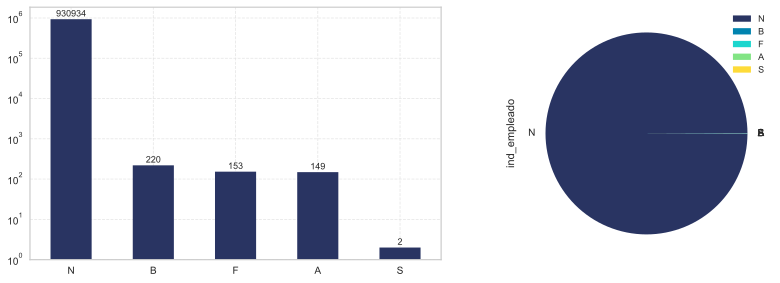

In [33]:
fig, (ax1, ax2) = Plot.subplots(nrows=1, ncols=2)

bars = df.ind_empleado.value_counts().plot.bar(log=True, rot=0, ax=ax1)
ax1.bar_label(bars.containers[0], padding=1)

df.ind_empleado.value_counts().plot.pie(ax=ax2)
ax2.legend()

Plot.show()

**Considera√ß√µes**

- Maior concentra√ß√£o dos clientes s√£o de n√£o-funcion√°rios do banco. 
- Podemos assumir nesta an√°lise a segmenta√ß√£o apenas dos n√£o-funcion√°rios. Posteriormente, poderia ser realizada uma nova an√°lise e segmenta√ß√£o apenas dos clientes funcion√°rios, pois estes normalmente possuem algumas vantagens com rela√ß√£o aos produtos do banco.

### `pais_residencia`

In [34]:
df.pais_residencia.value_counts()

ES    927461
FR       312
AR       289
GB       283
DE       280
       ...  
BZ         1
CD         1
ZW         1
GM         1
DJ         1
Name: pais_residencia, Length: 118, dtype: int64

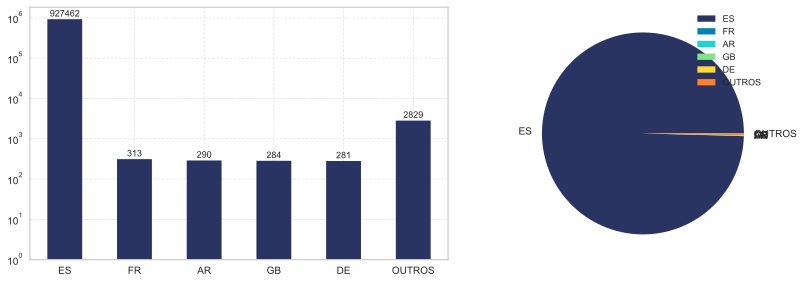

In [35]:
fig, (ax1, ax2) = Plot.subplots(nrows=1, ncols=2)

# Cria uma nova categoria
df1 = df.pais_residencia.value_counts()[:5]
df2 = pd.Series({'OUTROS': df.pais_residencia.value_counts()[5:].sum()})
df3 = pd.concat([df1, df2])

bars = df3.plot.bar(log=True, rot=0, ax=ax1)
ax1.bar_label(bars.containers[0], padding=1)

df3.plot.pie(ax=ax2)
ax2.legend()

Plot.show()

**Considera√ß√µes**

- Maior concentra√ß√£o de clientes na Espanha.
- Como alguns clientes de outros pa√≠ses possuem dados nulos, neste estudo ser√£o considerados apenas os clientes que residem na Espanha.

### `sexo`

In [36]:
df.sexo.value_counts()

V    505582
H    425866
Name: sexo, dtype: int64

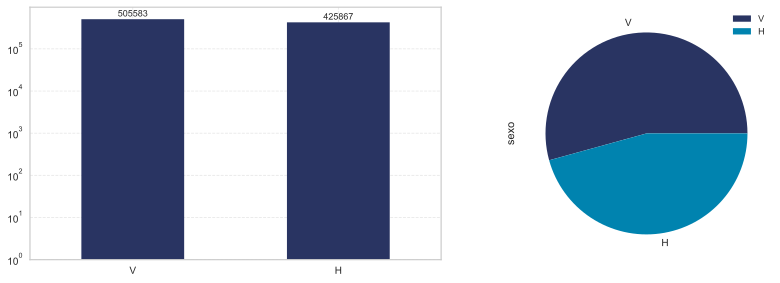

In [37]:
fig, (ax1, ax2) = Plot.subplots(nrows=1, ncols=2)

bars = df.sexo.value_counts().plot.bar(log=True, rot=0, ax=ax1)
ax1.bar_label(bars.containers[0], padding=1)

df.sexo.value_counts().plot.pie(ax=ax2)
ax2.legend()

Plot.show()

**Considera√ß√µes**

- Classe bem equilibrada e possui um bom potencial de discrimina√ß√£o entre os clientes. 
- Possui valores nulos.

### `indrel_1mes`

In [38]:
df.indrel_1mes.value_counts()

1.0    612214
1      314700
3.0       189
3         116
P          77
2.0        62
2          60
4.0        17
4           8
Name: indrel_1mes, dtype: int64

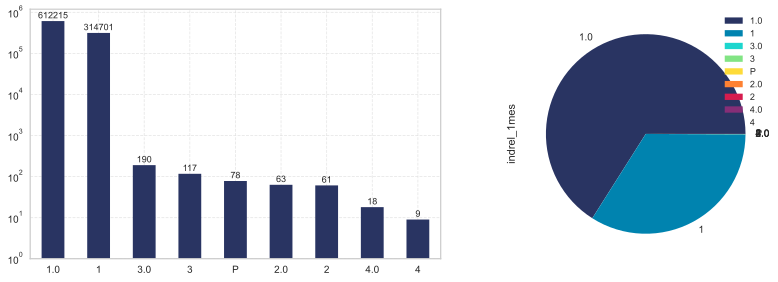

In [39]:
fig, (ax1, ax2) = Plot.subplots(nrows=1, ncols=2)

bars = df.indrel_1mes.value_counts().plot.bar(log=True, rot=0, ax=ax1)
ax1.bar_label(bars.containers[0], padding=1)

df.indrel_1mes.value_counts().plot.pie(ax=ax2)
ax2.legend()

Plot.show()

**Considera√ß√µes**

- Maior concentra√ß√£o de clientes prim√°rios 1.
- Valores misturados entre inteiro e real, precisa ser normalizado.
- Para simplificar o problema, ser√£o analisados apenas os perfis dos clientes prim√°rios.

`tiprel_1mes`

In [40]:
df.tiprel_1mes.value_counts()

I    534429
A    392607
P       330
R        77
Name: tiprel_1mes, dtype: int64

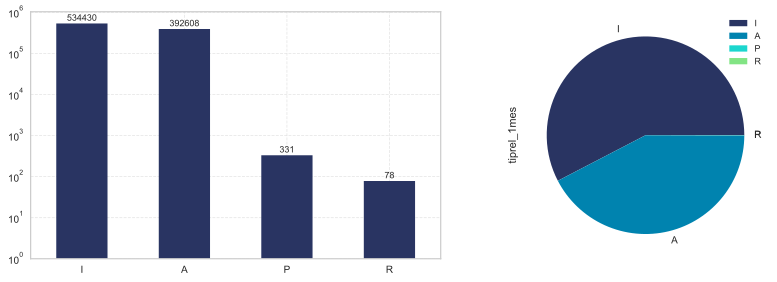

In [41]:
fig, (ax1, ax2) = Plot.subplots(nrows=1, ncols=2)

bars = df.tiprel_1mes.value_counts().plot.bar(log=True, rot=0, ax=ax1)
ax1.bar_label(bars.containers[0], padding=1)

df.tiprel_1mes.value_counts().plot.pie(ax=ax2)
ax2.legend()

Plot.show()

**Considera√ß√µes**

- Considerar apenas os clientes ativos e inativos.

### `indresi`

In [42]:
df.indresi.value_counts()

S    927461
N      3992
Name: indresi, dtype: int64

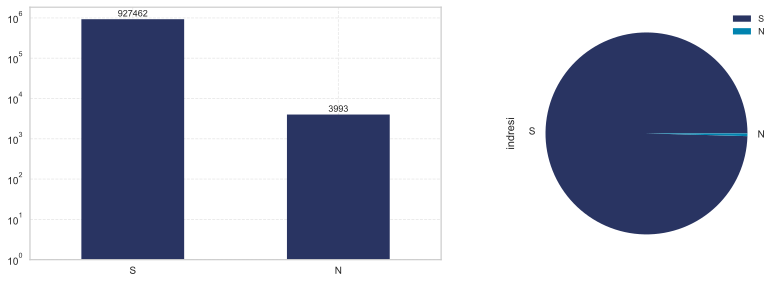

In [43]:
fig, (ax1, ax2) = Plot.subplots(nrows=1, ncols=2)

bars = df.indresi.value_counts().plot.bar(log=True, rot=0, ax=ax1)
ax1.bar_label(bars.containers[0], padding=1)

df.indresi.value_counts().plot.pie(ax=ax2)
ax2.legend()

Plot.show()

**Considera√ß√µes**

- Maior concentra√ß√£o clientes que residem no mesmo pa√≠s do banco.
- Selecionar apenas estes clientes para a an√°lise.

### `indext`

In [44]:
df.indext.value_counts()

N    885213
S     46240
Name: indext, dtype: int64

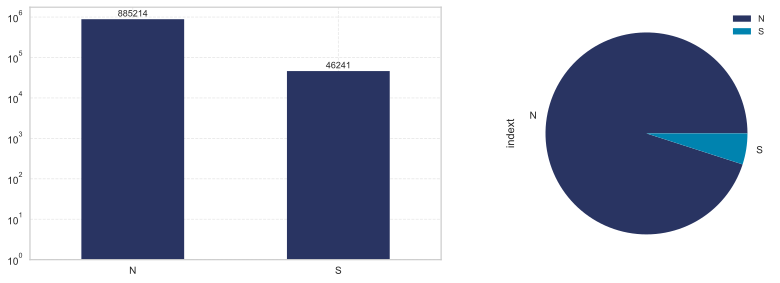

In [45]:
fig, (ax1, ax2) = Plot.subplots(nrows=1, ncols=2)

bars = df.indext.value_counts().plot.bar(log=True, rot=0, ax=ax1)
ax1.bar_label(bars.containers[0], padding=1)

df.indext.value_counts().plot.pie(ax=ax2)
ax2.legend()

Plot.show()

**Considera√ß√µes**

- Maior concentra√ß√£o de clientes que n√£o nasceram em outro pa√≠s.
- Por ser um atributo categ√≥rico e desbalanceado, ser√° ignorado.

### `canal_entrada`

In [46]:
df.canal_entrada.value_counts()

KHE    251804
KAT    206088
KFC    200892
KHQ     75073
KHM     31120
        ...  
KDL         1
KDI         1
KDB         1
025         1
KGN         1
Name: canal_entrada, Length: 162, dtype: int64

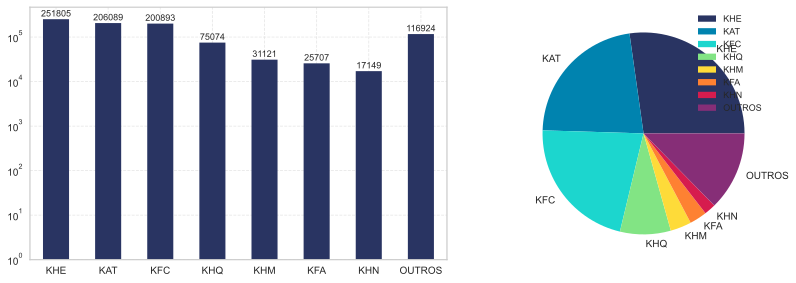

In [47]:
fig, (ax1, ax2) = Plot.subplots(nrows=1, ncols=2)

# Cria uma nova categoria
df1 = df.canal_entrada.value_counts()[:7]
df2 = pd.Series({'OUTROS': df.canal_entrada.value_counts()[7:].sum()})
df3 = pd.concat([df1, df2])

bars = df3.plot.bar(log=True, rot=0, ax=ax1)
ax1.bar_label(bars.containers[0], padding=1)

df3.plot.pie(ax=ax2)
ax2.legend()

Plot.show()

**Considera√ß√µes**

- KHE, KFC, KHE tem a maior frequ√™ncia no conjunto.
- Outras classes tem menor frequ√™ncia, podem ser agrupadas.

### `indfall`

In [48]:
df.indfall.value_counts()

N    929087
S      2366
Name: indfall, dtype: int64

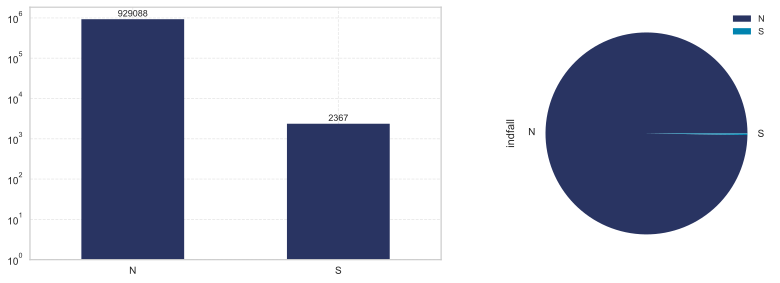

In [49]:
fig, (ax1, ax2) = Plot.subplots(nrows=1, ncols=2)

bars = df.indfall.value_counts().plot.bar(log=True, rot=0, ax=ax1)
ax1.bar_label(bars.containers[0], padding=1)

df.indfall.value_counts().plot.pie(ax=ax2)
ax2.legend()

Plot.show()

**Considera√ß√µes**

- Remover os clientes com status S. 

### `nomprov`

In [50]:
df.nomprov.value_counts()

MADRID       298841
BARCELONA     88754
VALENCIA      48103
SEVILLA       40581
CORU√ëA, A     28771
              ...  
ALAVA          2597
TERUEL         1538
SORIA          1261
MELILLA         641
CEUTA           513
Name: nomprov, Length: 52, dtype: int64

In [51]:
df.query('pais_residencia != "ES" and nomprov.notna()')[['nomprov', 'pais_residencia']]

nomprov pais_residencia
251031       MADRID              DE
256521       MADRID              IT
258803       MADRID              BO
351268  PALMAS, LAS              PY
356733  GUADALAJARA              PY

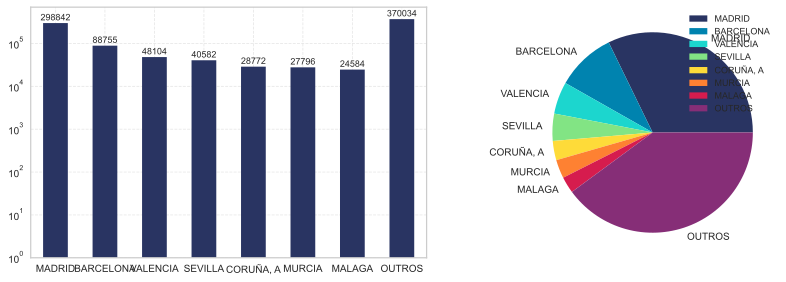

In [52]:
fig, (ax1, ax2) = Plot.subplots(nrows=1, ncols=2)

# Cria uma nova categoria
df1 = df.nomprov.value_counts()[:7]
df2 = pd.Series({'OUTROS': df.nomprov.value_counts()[7:].sum()})
df3 = pd.concat([df1, df2])

bars = df3.plot.bar(log=True, rot=0, ax=ax1)
ax1.bar_label(bars.containers[0], padding=1)

df3.plot.pie(ax=ax2)
ax2.legend()

Plot.show()

**Considera√ß√µes**

- Existem 4 prov√≠ncias com classifica√ß√£o errada.
- As cidades s√£o atributos categ√≥ricos e n√£o possuem rela√ß√£o de ordem. O ideal √© trabalhar como coordenadas geogr√°ficas, assim √© poss√≠vel identificar se pessoas pr√≥ximas a uma regi√£o possuem o mesmo perfil.

### `segmento`

In [53]:
df.segmento.value_counts()

02 - PARTICULARES     542596
03 - UNIVERSITARIO    346417
01 - TOP               35415
Name: segmento, dtype: int64

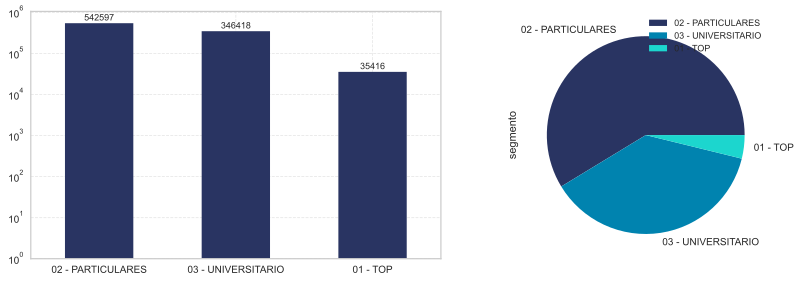

In [54]:
fig, (ax1, ax2) = Plot.subplots(nrows=1, ncols=2)

bars = df.segmento.value_counts().plot.bar(log=True, rot=0, ax=ax1)
ax1.bar_label(bars.containers[0], padding=1)

df.segmento.value_counts().plot.pie(ax=ax2)
ax2.legend()

Plot.show()

**Considera√ß√µes**

- Existem valores nulos.

## An√°lise - atributos booleanos

In [55]:
# Verifica o dom√≠nio de todos os atributos do conjunto de dados
DataAnalysis.print_summary(df, 'bool')

                                                    Tipo: bool                                                     
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Tipo   ‚îÉ Atributo           ‚îÉ Dom√≠nio                                                ‚îÉ √önicos ‚îÉ Nulos  ‚îÉ Nulos% ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ bool   ‚îÇ ind_nuevo          ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ conyuemp           ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ tipodom            ‚îÇ [ True]                                                ‚îÇ 1      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_actividad_cli‚Ä¶ ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_ahor_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_aval_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_cco_fin_ult1   ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_cder_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_cno_fin_ult1   ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_ctju_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_ctma_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_ctop_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_ctpp_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_deco_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_deme_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_dela_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_ecue_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_fond_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_hip_fin_ult1   ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_plan_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_pres_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_reca_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_tjcr_fin_ult1  ‚îÇ [False  True]                                          ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ bool   ‚îÇ ind_valo_fin_ult1  ‚îÇ [False  True]                 

In [56]:
campos_booleanos = ['ind_nuevo', 'conyuemp', 'tipodom', 'ind_actividad_cliente', 'ind_ahor_fin_ult1',
                    'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
                    'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
                    'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
                    'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
                    'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
                    'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1',]
len(campos_booleanos)

28

In [57]:
table = Table(show_header=True, header_style="bold", title=f'Atributos booleanos') 
table.add_column("Atributo", style="green", width=24)
table.add_column("True",  style='blue', width=24)
table.add_column("False",  style='red', width=24)

resumo = []
for i in campos_booleanos:
    ntrue = len(df[i][df[i] == True])
    nfalse = len(df[i][df[i] == False])
    total = len(df[i])
    resumo.append((i, ntrue, nfalse))
                 
# Desenha a tabela
for i, ntrue, nfalse in sorted(resumo, key=lambda k: k[1], reverse=True):
    table.add_row(i, f'{ntrue / total * 100:.2f}%', f'{nfalse / total * 100:.2f}%')

console.print(table)

                               Atributos booleanos                                
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Atributo                 ‚îÉ True                     ‚îÉ False                    ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ tipodom                  ‚îÇ 100.00%                  ‚îÇ 0.00%                    ‚îÇ
‚îÇ ind_cco_fin_ult1         ‚îÇ 60.29%                   ‚îÇ 39.71%                   ‚îÇ
‚îÇ ind_actividad_cliente    ‚îÇ 42.48%                   ‚îÇ 57.52%                   ‚îÇ
‚îÇ ind_recibo_ult1          ‚îÇ 12.14%                   ‚îÇ 87.86%                   ‚îÇ
‚îÇ ind_ctop_fin_ult1        ‚îÇ 10.80%                   ‚îÇ 89.20%                   ‚îÇ
‚îÇ ind_ecue_fin_ult1        ‚îÇ 8.14%                    ‚îÇ 91.86%                   ‚îÇ
‚îÇ ind_cno_fin_ult1         ‚îÇ 7.84%                    ‚îÇ 92.16%                   ‚îÇ
‚îÇ ind_nom_pens_ult1        ‚îÇ 5.67%                    ‚îÇ 94.33%                   ‚îÇ
‚îÇ ind_nomina_ult1          ‚îÇ 5.19%                    ‚îÇ 94.81%                   ‚îÇ
‚îÇ ind_reca_fin_ult1        ‚îÇ 4.89%                    ‚îÇ 95.11%                   ‚îÇ
‚îÇ ind_tjcr_fin_ult1        ‚îÇ 3.74%                    ‚îÇ 96.26%                   ‚îÇ
‚îÇ ind_nuevo                ‚îÇ 3.69%                    ‚îÇ 96.31%                   ‚îÇ
‚îÇ ind_ctpp_fin_ult1        ‚îÇ 3.57%                    ‚îÇ 96.43%                   ‚îÇ
‚îÇ ind_dela_fin_ult1        ‚îÇ 3.35%                    ‚îÇ 96.65%                   ‚îÇ
‚îÇ ind_valo_fin_ult1        ‚îÇ 2.30%                    ‚îÇ 97.70%                   ‚îÇ
‚îÇ ind_fond_fin_ult1        ‚îÇ 1.58%                    ‚îÇ 98.42%                   ‚îÇ
‚îÇ ind_ctma_fin_ult1        ‚îÇ 0.87%                    ‚îÇ 99.13%                   ‚îÇ
‚îÇ ind_ctju_fin_ult1        ‚îÇ 0.81%                    ‚îÇ 99.19%                   ‚îÇ
‚îÇ ind_plan_fin_ult1        ‚îÇ 0.79%                    ‚îÇ 99.21%                   ‚îÇ
‚îÇ ind_hip_fin_ult1         ‚îÇ 0.49%                    ‚îÇ 99.51%                   ‚îÇ
‚îÇ ind_viv_fin_ult1         ‚îÇ 0.32%                    ‚îÇ 99.68%                   ‚îÇ
‚îÇ ind_pres_fin_ult1        ‚îÇ 0.21%                    ‚îÇ 99.79%                   ‚îÇ
‚îÇ ind_deme_fin_ult1        ‚îÇ 0.11%                    ‚îÇ 99.89%                   ‚îÇ
‚îÇ ind_deco_fin_ult1        ‚îÇ 0.03%                    ‚îÇ 99.97%                   ‚îÇ
‚îÇ ind_cder_fin_ult1        ‚îÇ 0.03%                    ‚îÇ 99.97%                   ‚îÇ
‚îÇ conyuemp                 ‚îÇ 0.01%                    ‚îÇ 99.99%                   ‚îÇ
‚îÇ ind_ahor_fin_ult1        ‚îÇ 0.01%                    ‚îÇ 99.99%                   ‚îÇ
‚îÇ ind_aval_fin_ult1        ‚îÇ 0.00%                    ‚îÇ 100.00%                  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [58]:
# Ordena os clientes pelo n√∫mero de produtos que ele possui
classes = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
           'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
           'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
           'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
           'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
           'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1',]
df[classes].sum(axis=1).sort_values()

0          0
412952     0
412950     0
412942     0
412940     0
          ..
259759    13
324351    13
283050    14
298717    14
334242    15
Length: 931453, dtype: int64

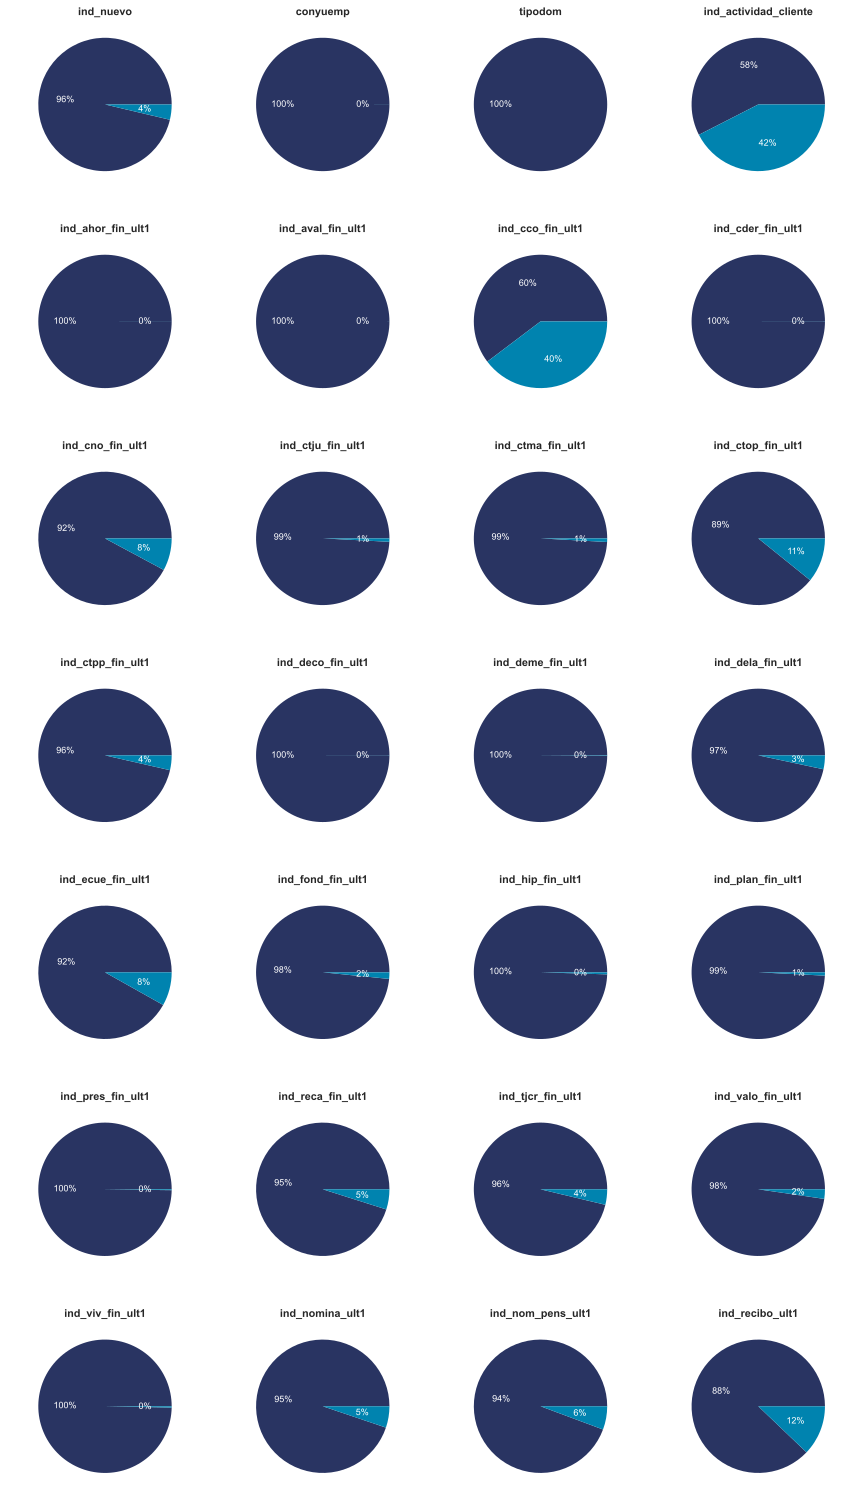

In [59]:
fig, ax = Plot.subplots(nrows=7, ncols=4)

for col, ax1 in zip(campos_booleanos, ax.flatten()):
    df[col].value_counts().plot.pie(ax=ax1, autopct='%1.0f%%', textprops={'color':"w"})
    ax1.set_title(col)
    ax1.set_ylabel('')

Plot.show()

In [60]:
classes_relevantes = ['ind_cco_fin_ult1', 'ind_recibo_ult1', 'ind_ctop_fin_ult1', 'ind_ecue_fin_ult1', 'ind_cno_fin_ult1',
                      'ind_nom_pens_ult1', 'ind_nomina_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_ctpp_fin_ult1',
                      'ind_dela_fin_ult1', 'ind_valo_fin_ult1', 'ind_fond_fin_ult1']

**Considera√ß√µes**

- Atributo `tipodom` pode ser removido pois √© sempre True.
- Atributo `conyuemp` e `ind_nuevo` podem ser removidos por serem bin√°rios e pouca relev√¢ncia.
- Maior parte das classes est√£o desbalanceadas, com amostragem menor que 1%.
- Classes mais relevantes:
    - ind_cco_fin_ult1: Conta Corrente
    - ind_recibo_ult1: D√©bito Direto
    - nd_ctop_fin_ult1: Conta Particular
    - ind_ecue_fin_ult1: e-account
    - ind_cno_fin_ult1: Conta Sal√°rio
    - ind_nom_pens_ult1: Pens√£o
    - ind_nomina_ult1: Folha de pagamento
    - ind_reca_fin_ult1: Impostos
    - ind_tjcr_fin_ult1: Cart√£o de cr√©dito
    - ind_ctpp_fin_ult1: Conta Particular Plus
    - ind_dela_fin_ult1: D√©posito Longo-Prazo
    - ind_valo_fin_ult1: T√≠tulos
    - ind_fond_fin_ult1: Fundos                
    

## Resumo

**Atributos num√©ricos**

- [x] `indrel`: remover
- [x] `age`: remover outliers < 18 e > 90
- [x] `ncodpers`: definir como √≠ndice do DataFrame
- [x] `antiguedad`: remover os registros com valor -999999
- [x] `cod_prov`: remover este campo
- [x] `renta`: 
    - remover dados faltantes - 25% da base

**Atributos categ√≥ricos**

- [x] `ind_empleado`: selecionar apenas os n√£o-funcion√°rios (N)
- [x] `pais_residencia`: selecionar apenas residentes na Espanha (ES)
- [x] `tiprel_1mes`: selecionar apenas clientes ativos e inativos (A, I)
- [x] `indrel_1mes`: 
    - normalizar valores para P, 1, 2, 3, 4
    - selecionar apenas clientes prim√°rios (1)
- [x] `indresi`: selecionar apenas residentes no pa√≠s do banco (S)
- [x] `indext`: remover
- [x] `canal_entrada`: agrupar os canais com menor frequ√™ncia
- [x] `indfall`: selecionar apenas os clientes vivos (N)
- [x] `nomprov`: 
    - corrigir cidades com classifica√ß√£o errada
    - TODO: converter para coordenadas geogr√°ficas
- [x] `conyuemp`: remover
- [x] Remover os exemplos com valores nulos
- [x] Converter atributos categ√≥ricos para inteiros: `ind_empleado`, `pais_residencia`, `sexo`, `indrel_1mes`, `tiprel_1mes`, `indresi`, `indext`, `canal_entrada`, `indfall`, `nomprov`, `segmento`

**Atributos booleanos**

- [x] `tipodom`: remover 
- [x] criar novo atributo com base no n√∫mero de produtos que um cliente possui

# üßπ Limpeza dos dados

In [61]:
# Salva a refer√™ncia do DataFrame original
df0 = df.copy()

## Atualiza√ß√£o do √≠ndice

In [62]:
# Atualiza o √≠ndice do DataFrame
df1 = df0.set_index('ncodpers')

## Atualiza√ß√£o dos valores de renda nulos

Para os registros sem renda, vamos considerar a renda m√©dia das pessoas de cada cidade. Usaremos a mediana para evitar a distor√ß√£o das pessoas super ricas que existem na base de dados. 

In [63]:
renda_por_cidade = df1[['renta', 'nomprov']].groupby('nomprov').median().to_dict()['renta']

for cidade, renda in renda_por_cidade.items():
    df1.loc[(df1['renta'].isna()) & (df1['nomprov'] == cidade), 'renta'] = renda
    
df1[df1['renta'].isna()].shape

(3952, 44)

Cerca de 3952 clientes n√£o possuem nem cidade, nem renda. Por ser um n√∫mero pequeno, estes registros podem ser descartados.

## Remo√ß√£o dos registros nulos

In [64]:
# Remo√ß√£o dos registros nulos dos atributos categ√≥ricos
df2 = df1.dropna()
df2.shape

(920396, 44)

## Convers√£o de tipos

In [65]:
# Corrige os par√¢metros do indrel_1mes
def corrigir_indrel_1mes(x):
    if x in ('1', '1.0'):
        return '1'
    elif x in ('2', '2.0'):
        return '2'
    elif x in ('3', '3.0'):
        return '3'
    elif x in ('4', '4.0'):
        return '4'
    return x

dfx = df2.copy()
dfx['indrel_1mes'] = dfx['indrel_1mes'].map(corrigir_indrel_1mes)
dfx = dfx[dfx.indrel_1mes == '1']

df3 = dfx
df3.indrel_1mes.value_counts()

1    920392
Name: indrel_1mes, dtype: int64

In [66]:
# Mescla os canais com pouca representatividade
dfx = df3.copy()
dfx['canal_entrada'] = dfx.canal_entrada.cat.add_categories('OUTROS')
dfx.loc[dfx['canal_entrada'].isin((dfx['canal_entrada'].value_counts()[dfx['canal_entrada'].value_counts() < 20_000]).index), 'canal_entrada'] = 'OUTROS'
dfx['canal_entrada'] = dfx.canal_entrada.cat.remove_unused_categories()

df4 = dfx
df4.canal_entrada.value_counts()

KHE       251536
KAT       204367
KFC       200278
OUTROS    132983
KHQ        75073
KHM        31080
KFA        25075
Name: canal_entrada, dtype: int64

In [67]:
# Corrige as cidades erradas
dfx = df4.copy()
dfx.loc[dfx.query('pais_residencia != "ES" and nomprov.notna()').index, 'pais_residencia'] = 'ES'

df5 = dfx
df5.query('pais_residencia != "ES" and nomprov.notna()')[['nomprov', 'pais_residencia']]

Empty DataFrame
Columns: [nomprov, pais_residencia]
Index: []

## Remo√ß√£o dos outliers

In [68]:
# Remove as idades que podem ser outliers
df6 = df5.query('age >= 18 and age <= 90')
df6.shape

(906284, 44)

In [69]:
# Remove os registros inv√°lidos
df7 = df6.query('antiguedad >= 0')
df7.shape

(906281, 44)

In [70]:
# Seleciona apenas n√£o funcion√°rios
df8 = df7.query('ind_empleado == "N"')
df8.shape

(905765, 44)

In [71]:
df9 = df8.query('pais_residencia == "ES"')
df9.shape

(905765, 44)

In [72]:
df10 = df9.query('indresi == "S"')
df10.shape

(905761, 44)

In [73]:
df11 = df10.query('indfall == "N"')
df11.shape

(904157, 44)

In [74]:
df12 = df11.query('tiprel_1mes in ("A", "I")')
df12.shape

(904157, 44)

## Remo√ß√£o dos atributos

In [75]:
# Remo√ß√£o dos atributos com pouca relev√¢ncia
excluidos = ['tipodom', 'cod_prov', 'indrel', 'indext', 'indrel_1mes', 'ind_nuevo', 'tiprel_1mes', 
             'ind_empleado', 'pais_residencia', 'indresi', 'indfall' , 'conyuemp',
             'ind_ctma_fin_ult1', 'ind_ctju_fin_ult1', 'ind_plan_fin_ult1', 
             'ind_hip_fin_ult1', 'ind_viv_fin_ult1', 'ind_pres_fin_ult1', 'ind_deme_fin_ult1',
             'ind_deco_fin_ult1', 'ind_cder_fin_ult1', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1']
            
df13 = df12.drop(columns=excluidos)
df13.head()

sexo  age  antiguedad canal_entrada    nomprov  \
ncodpers                                                  
657640      H   68         114        OUTROS     MADRID   
657788      H   42         114        OUTROS     MADRID   
657795      V   44         114        OUTROS  RIOJA, LA   
657790      V   42         114        OUTROS    BIZKAIA   
657794      H   49         114           KAT  BARCELONA   

          ind_actividad_cliente       renta           segmento  \
ncodpers                                                         
657640                    False  147347.970  02 - PARTICULARES   
657788                     True  132559.350  02 - PARTICULARES   
657795                     True   81399.570  02 - PARTICULARES   
657790                     True   97637.505  02 - PARTICULARES   
657794                     True  102189.000           01 - TOP   

          ind_cco_fin_ult1  ind_cno_fin_ult1  ind_ctop_fin_ult1  \
ncodpers                                                          
657640               False             False              False   
657788                True             False              False   
657795                True             False              False   
657790               False              True              False   
657794                True             False              False   

          ind_ctpp_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  \
ncodpers                                                            
657640                False              False              False   
657788                False              False              False   
657795                False              False              False   
657790                False              False               True   
657794                False               True              False   

          ind_fond_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
ncodpers                                                            
657640                False              False              False   
657788                False              False              False   
657795                False              False              False   
657790                False              False               True   
657794                False              False              False   

          ind_valo_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  \
ncodpers                                                          
657640                False            False              False   
657788                False            False              False   
657795                False            False              False   
657790                False             True               True   
657794                False            False              False   

          ind_recibo_ult1  
ncodpers                   
657640              False  
657788              False  
657795              False  
657790               True  
657794              False

## Cria√ß√£o dos atributos

In [76]:
df14 = df13.copy()
df14['num_produtos'] = df14[classes_relevantes].sum(axis=1)
df14.head()

sexo  age  antiguedad canal_entrada    nomprov  \
ncodpers                                                  
657640      H   68         114        OUTROS     MADRID   
657788      H   42         114        OUTROS     MADRID   
657795      V   44         114        OUTROS  RIOJA, LA   
657790      V   42         114        OUTROS    BIZKAIA   
657794      H   49         114           KAT  BARCELONA   

          ind_actividad_cliente       renta           segmento  \
ncodpers                                                         
657640                    False  147347.970  02 - PARTICULARES   
657788                     True  132559.350  02 - PARTICULARES   
657795                     True   81399.570  02 - PARTICULARES   
657790                     True   97637.505  02 - PARTICULARES   
657794                     True  102189.000           01 - TOP   

          ind_cco_fin_ult1  ind_cno_fin_ult1  ind_ctop_fin_ult1  \
ncodpers                                                          
657640               False             False              False   
657788                True             False              False   
657795                True             False              False   
657790               False              True              False   
657794                True             False              False   

          ind_ctpp_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  \
ncodpers                                                            
657640                False              False              False   
657788                False              False              False   
657795                False              False              False   
657790                False              False               True   
657794                False               True              False   

          ind_fond_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
ncodpers                                                            
657640                False              False              False   
657788                False              False              False   
657795                False              False              False   
657790                False              False               True   
657794                False              False              False   

          ind_valo_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  \
ncodpers                                                          
657640                False            False              False   
657788                False            False              False   
657795                False            False              False   
657790                False             True               True   
657794                False            False              False   

          ind_recibo_ult1  num_produtos  
ncodpers                                 
657640              False             0  
657788              False             1  
657795              False             1  
657790               True             6  
657794              False             2

## Converte valores categ√≥ricos

In [77]:
# Converte as classes booleanas para 0 .. 1
dfx = df14.copy()

classes_bool = classes_relevantes + ['ind_actividad_cliente']
for classe in classes_bool:
    dfx[classe].replace({True: 1, False: 0}, inplace=True)
    
df15 = dfx
df15

sexo  age  antiguedad canal_entrada    nomprov  \
ncodpers                                                  
657640      H   68         114        OUTROS     MADRID   
657788      H   42         114        OUTROS     MADRID   
657795      V   44         114        OUTROS  RIOJA, LA   
657790      V   42         114        OUTROS    BIZKAIA   
657794      H   49         114           KAT  BARCELONA   
...       ...  ...         ...           ...        ...   
1166766     V   25          33           KHE   ZARAGOZA   
1166765     V   22          33           KHE   ZARAGOZA   
1166764     V   23          33           KHE  RIOJA, LA   
1166763     H   47          33           KHE   ZARAGOZA   
1166789     H   22          33           KHE   ZARAGOZA   

          ind_actividad_cliente       renta            segmento  \
ncodpers                                                          
657640                        0  147347.970   02 - PARTICULARES   
657788                        1  132559.350   02 - PARTICULARES   
657795                        1   81399.570   02 - PARTICULARES   
657790                        1   97637.505   02 - PARTICULARES   
657794                        1  102189.000            01 - TOP   
...                         ...         ...                 ...   
1166766                       0   50945.250  03 - UNIVERSITARIO   
1166765                       0   43912.170  03 - UNIVERSITARIO   
1166764                       0   23334.990  03 - UNIVERSITARIO   
1166763                       1   99607.890   02 - PARTICULARES   
1166789                       0  199592.820  03 - UNIVERSITARIO   

          ind_cco_fin_ult1  ind_cno_fin_ult1  ind_ctop_fin_ult1  \
ncodpers                                                          
657640                   0                 0                  0   
657788                   1                 0                  0   
657795                   1                 0                  0   
657790                   0                 1                  0   
657794                   1                 0                  0   
...                    ...               ...                ...   
1166766                  1                 0                  0   
1166765                  1                 0                  0   
1166764                  1                 0                  0   
1166763                  1                 0                  0   
1166789                  1                 0                  0   

          ind_ctpp_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    0                  0                  1   
657794                    0                  1                  0   
...                     ...                ...                ...   
1166766                   0                  0                  0   
1166765                   0                  0                  0   
1166764                   0                  0                  0   
1166763                   0                  0                  0   
1166789                   0                  0                  0   

          ind_fond_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    0                  0                  1   
657794                    0                  0                  0   
...                     ...                ...                ...   
1166766                   0                  0 

In [78]:
df16 = pd.get_dummies(df15, columns=['sexo', 'canal_entrada', 'nomprov', 'ind_actividad_cliente', 'segmento'])
df16.head()

age  antiguedad       renta  ind_cco_fin_ult1  ind_cno_fin_ult1  \
ncodpers                                                                    
657640     68         114  147347.970                 0                 0   
657788     42         114  132559.350                 1                 0   
657795     44         114   81399.570                 1                 0   
657790     42         114   97637.505                 0                 1   
657794     49         114  102189.000                 1                 0   

          ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_dela_fin_ult1  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    0                  0                  0   
657794                    0                  0                  1   

          ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_reca_fin_ult1  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    1                  0                  0   
657794                    0                  0                  0   

          ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_nomina_ult1  \
ncodpers                                                          
657640                    0                  0                0   
657788                    0                  0                0   
657795                    0                  0                0   
657790                    1                  0                1   
657794                    0                  0                0   

          ind_nom_pens_ult1  ind_recibo_ult1  num_produtos  sexo_H  sexo_V  \
ncodpers                                                                     
657640                    0                0             0       1       0   
657788                    0                0             1       1       0   
657795                    0                0             1       0       1   
657790                    1                1             6       0       1   
657794                    0                0             2       1       0   

          canal_entrada_KAT  canal_entrada_KFA  canal_entrada_KFC  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    0                  0                  0   
657794                    1                  0                  0   

          canal_entrada_KHE  canal_entrada_KHM  canal_entrada_KHQ  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    0                  0                  0   
657794                    0                  0                  0   

          canal_entrada_OUTROS  nomprov_ALAVA  nomprov_ALBACETE  \
ncodpers                                                          
657640                       1              0                 0   
657788                       1              0                 0   
657795                       1              0                 0   
657790                       1              0                 0   
657794                       0              0                 0   

          nomprov_ALICANTE  nomprov_ALMERIA  no

## Converte as escalas dos valores num√©ricos

In [79]:
atributos = ['age', 'antiguedad', 'renta', 'num_produtos']

scaler = MinMaxScaler()

dfx = df16.copy()
dfx[atributos] = scaler.fit_transform(dfx[atributos].values)

df17 = dfx
df17.head()

age  antiguedad     renta  ind_cco_fin_ult1  ind_cno_fin_ult1  \
ncodpers                                                                       
657640    0.694444    0.445312  0.005058                 0                 0   
657788    0.333333    0.445312  0.004546                 1                 0   
657795    0.361111    0.445312  0.002776                 1                 0   
657790    0.333333    0.445312  0.003338                 0                 1   
657794    0.430556    0.445312  0.003495                 1                 0   

          ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_dela_fin_ult1  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    0                  0                  0   
657794                    0                  0                  1   

          ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_reca_fin_ult1  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    1                  0                  0   
657794                    0                  0                  0   

          ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_nomina_ult1  \
ncodpers                                                          
657640                    0                  0                0   
657788                    0                  0                0   
657795                    0                  0                0   
657790                    1                  0                1   
657794                    0                  0                0   

          ind_nom_pens_ult1  ind_recibo_ult1  num_produtos  sexo_H  sexo_V  \
ncodpers                                                                     
657640                    0                0      0.000000       1       0   
657788                    0                0      0.076923       1       0   
657795                    0                0      0.076923       0       1   
657790                    1                1      0.461538       0       1   
657794                    0                0      0.153846       1       0   

          canal_entrada_KAT  canal_entrada_KFA  canal_entrada_KFC  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    0                  0                  0   
657794                    1                  0                  0   

          canal_entrada_KHE  canal_entrada_KHM  canal_entrada_KHQ  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    0                  0                  0   
657794                    0                  0                  0   

          canal_entrada_OUTROS  nomprov_ALAVA  nomprov_ALBACETE  \
ncodpers                                                          
657640                       1              0                 0   
657788                       1              0                 0   
657795                       1              0                 0   
657790                       1              0                 0   
657794                       0              0                 0   

          nomprov_ALICANTE  nom

In [80]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904157 entries, 657640 to 1166789
Data columns (total 83 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             904157 non-null  float64
 1   antiguedad                      904157 non-null  float64
 2   renta                           904157 non-null  float64
 3   ind_cco_fin_ult1                904157 non-null  int64  
 4   ind_cno_fin_ult1                904157 non-null  int64  
 5   ind_ctop_fin_ult1               904157 non-null  int64  
 6   ind_ctpp_fin_ult1               904157 non-null  int64  
 7   ind_dela_fin_ult1               904157 non-null  int64  
 8   ind_ecue_fin_ult1               904157 non-null  int64  
 9   ind_fond_fin_ult1               904157 non-null  int64  
 10  ind_reca_fin_ult1               904157 non-null  int64  
 11  ind_tjcr_fin_ult1               904157 non-null  int64  
 12  ind_valo_f

In [81]:
DataAnalysis.print_summary(df17)

                                                     Tipo: int                                                     
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Tipo   ‚îÉ Atributo           ‚îÉ Dom√≠nio                                                ‚îÉ √önicos ‚îÉ Nulos  ‚îÉ Nulos% ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ uint8  ‚îÇ sexo_H             ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ sexo_V             ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ canal_entrada_KAT  ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ canal_entrada_KFA  ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ canal_entrada_KFC  ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ canal_entrada_KHE  ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ canal_entrada_KHM  ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ canal_entrada_KHQ  ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ canal_entrada_OUT‚Ä¶ ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_ALAVA      ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_ALBACETE   ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_ALICANTE   ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_ALMERIA    ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_ASTURIAS   ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_AVILA      ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_BADAJOZ    ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_BALEARS,   ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ        ‚îÇ ILLES              ‚îÇ                                                        ‚îÇ        ‚îÇ        ‚îÇ        ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_BARCELONA  ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_BIZKAIA    ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_BURGOS     ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_CACERES    ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_CADIZ      ‚îÇ (0, 1)                                                 ‚îÇ 2      ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ uint8  ‚îÇ nomprov_CANTABRIA  ‚îÇ (0, 1)                        

                                                    Tipo: float                                                    
‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Tipo   ‚îÉ Atributo           ‚îÉ Dom√≠nio                                                ‚îÉ √önicos ‚îÉ Nulos  ‚îÉ Nulos% ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ float‚Ä¶ ‚îÇ age                ‚îÇ (0.0, 1.0)                                             ‚îÇ 73     ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ float‚Ä¶ ‚îÇ antiguedad         ‚îÇ (0.0, 1.0)                                             ‚îÇ 257    ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ float‚Ä¶ ‚îÇ renta              ‚îÇ (0.0, 1.0)                                             ‚îÇ 510292 ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îÇ float‚Ä¶ ‚îÇ num_produtos       ‚îÇ (0.0, 1.0)                                             ‚îÇ 14     ‚îÇ 0      ‚îÇ 0.00%  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

# ü§ñ Treinamento do modelo

Devido ao grande n√∫mero de amostras da base, vamos selecionar apenas alguns dos atributos que representam valores cont√≠nuos e que possuam alguma relev√¢ncia.

In [82]:
dff = df17
dff.head()

age  antiguedad     renta  ind_cco_fin_ult1  ind_cno_fin_ult1  \
ncodpers                                                                       
657640    0.694444    0.445312  0.005058                 0                 0   
657788    0.333333    0.445312  0.004546                 1                 0   
657795    0.361111    0.445312  0.002776                 1                 0   
657790    0.333333    0.445312  0.003338                 0                 1   
657794    0.430556    0.445312  0.003495                 1                 0   

          ind_ctop_fin_ult1  ind_ctpp_fin_ult1  ind_dela_fin_ult1  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    0                  0                  0   
657794                    0                  0                  1   

          ind_ecue_fin_ult1  ind_fond_fin_ult1  ind_reca_fin_ult1  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    1                  0                  0   
657794                    0                  0                  0   

          ind_tjcr_fin_ult1  ind_valo_fin_ult1  ind_nomina_ult1  \
ncodpers                                                          
657640                    0                  0                0   
657788                    0                  0                0   
657795                    0                  0                0   
657790                    1                  0                1   
657794                    0                  0                0   

          ind_nom_pens_ult1  ind_recibo_ult1  num_produtos  sexo_H  sexo_V  \
ncodpers                                                                     
657640                    0                0      0.000000       1       0   
657788                    0                0      0.076923       1       0   
657795                    0                0      0.076923       0       1   
657790                    1                1      0.461538       0       1   
657794                    0                0      0.153846       1       0   

          canal_entrada_KAT  canal_entrada_KFA  canal_entrada_KFC  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    0                  0                  0   
657794                    1                  0                  0   

          canal_entrada_KHE  canal_entrada_KHM  canal_entrada_KHQ  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    0                  0                  0   
657794                    0                  0                  0   

          canal_entrada_OUTROS  nomprov_ALAVA  nomprov_ALBACETE  \
ncodpers                                                          
657640                       1              0                 0   
657788                       1              0                 0   
657795                       1              0                 0   
657790                       1              0                 0   
657794                       0              0                 0   

          nomprov_ALICANTE  nom

## KMeans

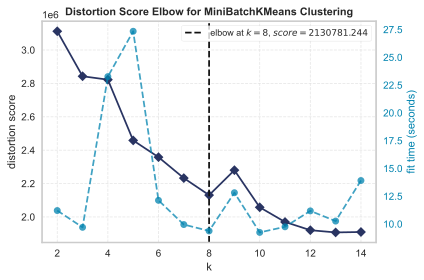

<AxesSubplot: title={'center': 'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
# Inicializa o classificador
km = MiniBatchKMeans(random_state=42, 
                     batch_size=multiprocessing.cpu_count() * 1024)

# Inicializa o visualizador do Score Elbow
visualizer = KElbowVisualizer(km, k=(2, 15))

visualizer.fit(dff)
visualizer.show()

Com base no gr√°fico, √© poss√≠vel verificar que `k = 8` apresenta o melhor resultado para n√∫mero de clusters

In [84]:
# Gera√ß√£o do modelo - k-Means
arquivo = './modelo_kmeans-k8.pkl'

if os.path.exists(arquivo):
    # Carrega o modelo salvo localmente
    print('Carregando modelo pr√©-treinado...')
    km = pickle.load(open(arquivo, 'rb'))
    
else:
    # Treina o modelo
    km = MiniBatchKMeans(n_clusters=8,
                         random_state=42, 
                         batch_size=multiprocessing.cpu_count() * 1024)
    
    # Iniciao treinamento
    km.fit(dff)
    pickle.dump(km, open(arquivo, 'wb'))

Carregando modelo pr√©-treinado...


# DBSCAN

In [85]:
# # Gera√ß√£o do modelo - k-Means
# arquivo = './modelo_dbscan-db1.pkl'

# if os.path.exists(arquivo):
#     # Carrega o modelo salvo localmente
#     print('Carregando modelo pr√©-treinado...')
#     db1 = pickle.load(open(arquivo, 'rb'))

# else:
#     # Treina o modelo
#     db1 = DBSCAN(
#         eps=0.3,
#         min_samples=13,
#         metric='manhattan', 
#         n_jobs=-multiprocessing.cpu_count() * 2, 
#         algorithm='ball_tree', 
#         leaf_size=15, 
#     )

#     db1.fit(dff)
#     pickle.dump(db1, open(arquivo, 'wb'))

In [86]:
# # Contar n√∫mero de clusters
# labels = db1.labels_
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

# print(f'N√∫mero estimado de clusters: {n_clusters_}')
# print(f'N√∫mero estimado de dados ruidosos: {n_noise_}')

N√£o foi poss√≠vel concluir os testes com o DBSCAN por limita√ß√µes de hardware. Em uma das execu√ß√µes ele identificou 721 clusters ap√≥s 12h de execu√ß√£o. Isso tornou invi√°vel a an√°lise de diferentes par√¢metros para ajustes do algoritmo.

# üìä An√°lise dos resultados e discuss√£o

Para verificar o perfil de cada cluster, vamos verificar quais as classes que est√£o mais presentes em cada conjunto

In [87]:
df18 = df15.copy()
df18['label'] = km.labels_
df18.head()

sexo  age  antiguedad canal_entrada    nomprov  \
ncodpers                                                  
657640      H   68         114        OUTROS     MADRID   
657788      H   42         114        OUTROS     MADRID   
657795      V   44         114        OUTROS  RIOJA, LA   
657790      V   42         114        OUTROS    BIZKAIA   
657794      H   49         114           KAT  BARCELONA   

          ind_actividad_cliente       renta           segmento  \
ncodpers                                                         
657640                        0  147347.970  02 - PARTICULARES   
657788                        1  132559.350  02 - PARTICULARES   
657795                        1   81399.570  02 - PARTICULARES   
657790                        1   97637.505  02 - PARTICULARES   
657794                        1  102189.000           01 - TOP   

          ind_cco_fin_ult1  ind_cno_fin_ult1  ind_ctop_fin_ult1  \
ncodpers                                                          
657640                   0                 0                  0   
657788                   1                 0                  0   
657795                   1                 0                  0   
657790                   0                 1                  0   
657794                   1                 0                  0   

          ind_ctpp_fin_ult1  ind_dela_fin_ult1  ind_ecue_fin_ult1  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    0                  0                  1   
657794                    0                  1                  0   

          ind_fond_fin_ult1  ind_reca_fin_ult1  ind_tjcr_fin_ult1  \
ncodpers                                                            
657640                    0                  0                  0   
657788                    0                  0                  0   
657795                    0                  0                  0   
657790                    0                  0                  1   
657794                    0                  0                  0   

          ind_valo_fin_ult1  ind_nomina_ult1  ind_nom_pens_ult1  \
ncodpers                                                          
657640                    0                0                  0   
657788                    0                0                  0   
657795                    0                0                  0   
657790                    0                1                  1   
657794                    0                0                  0   

          ind_recibo_ult1  num_produtos  label  
ncodpers                                        
657640                  0             0      2  
657788                  0             1      4  
657795                  0             1      3  
657790                  1             6      7  
657794                  0             2      4

In [88]:
df18.groupby('label')['label'].count()

label
0    186524
1     54436
2    106525
3    147115
4     97138
5    111335
6    142187
7     58897
Name: label, dtype: int64

In [89]:
atributos = {
    'A': 'sexo',
    'B': 'canal_entrada',
    'C': 'ind_actividad_cliente',
    'D': 'segmento',
    'E': 'ind_cco_fin_ult1',
    'F': 'ind_cno_fin_ult1',
    'G': 'ind_ctop_fin_ult1',
    'H': 'ind_ctpp_fin_ult1',
    'I': 'ind_dela_fin_ult1',
    'J': 'ind_ecue_fin_ult1',
    'K': 'ind_fond_fin_ult1',
    'L': 'ind_reca_fin_ult1',
    'M': 'ind_tjcr_fin_ult1',
    'N': 'ind_valo_fin_ult1',
    'O': 'ind_nomina_ult1',
    'P': 'ind_nom_pens_ult1',
    'Q': 'ind_recibo_ult1',
}

In [92]:
dff = df18

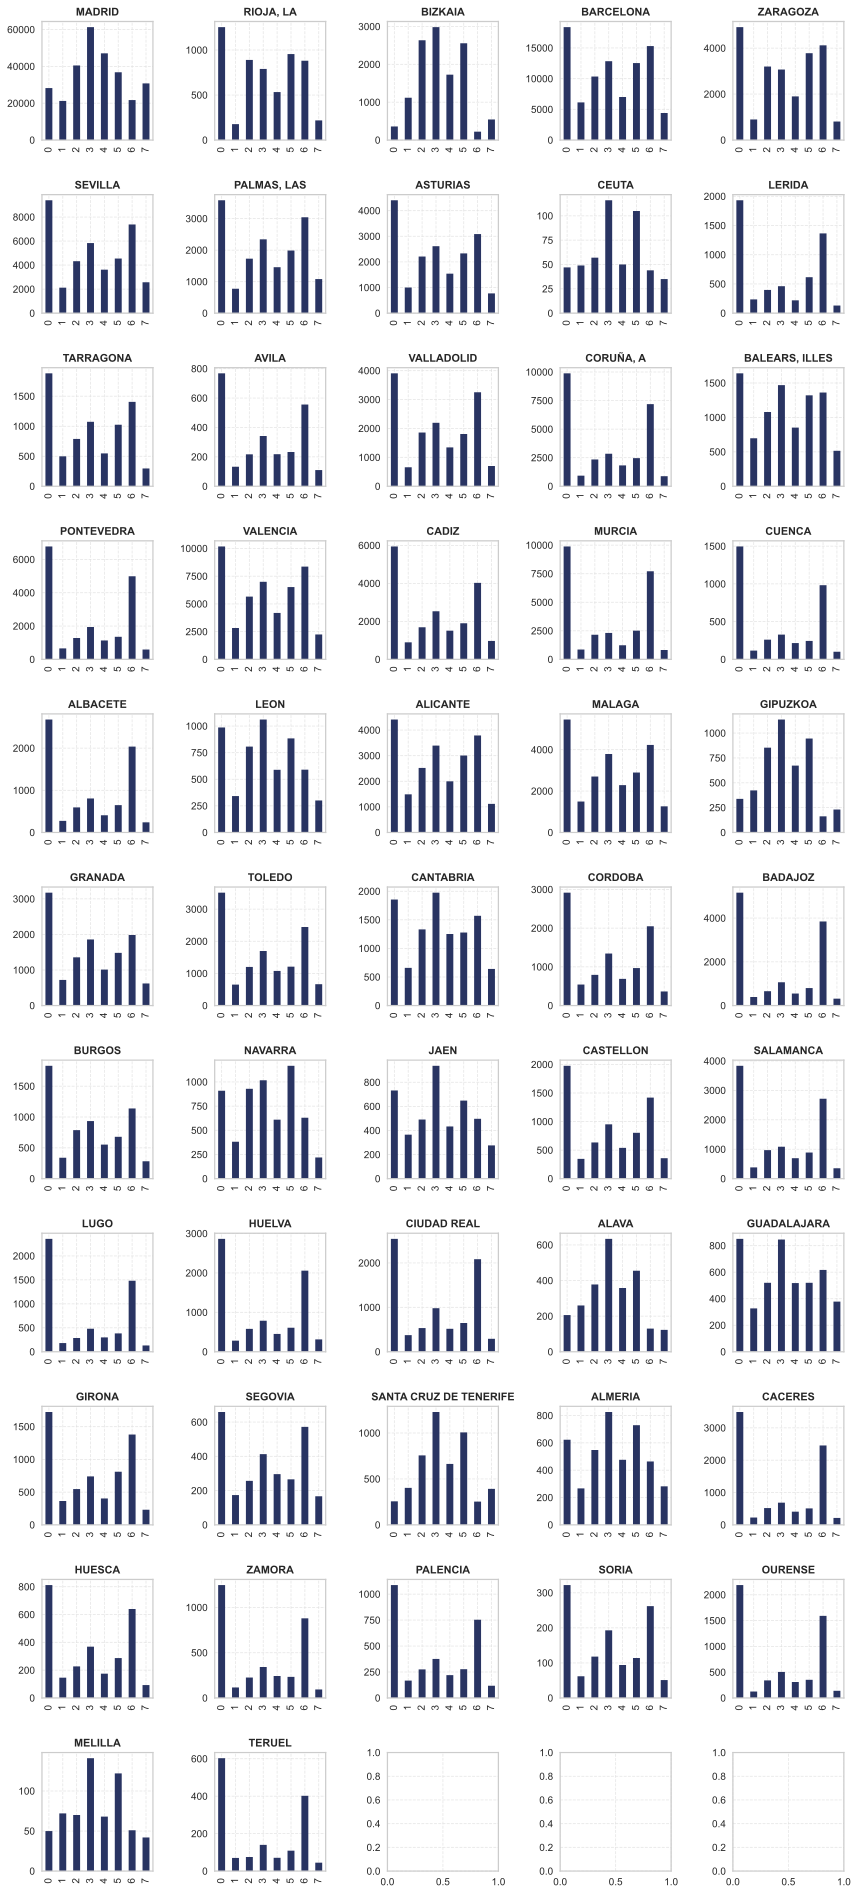

In [93]:
fig, ax = Plot.subplots(nrows=11, ncols=5)

for cidade, ax1 in zip(dff['nomprov'].unique(), ax.flatten()):
    dff.query(f'nomprov == "{cidade}"').groupby(['label'])['label'].count().plot.bar(ax=ax1, label=cidade)
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    ax1.set_title(cidade)  

Plot.show()

In [94]:
cidades = []
for cidade, ax1 in zip(dff['nomprov'].unique(), ax.flatten()):
    label = str(dff.query(f'nomprov == "{cidade}"')['label'].value_counts())[0]
    cidades.append((cidade, label))
    
for cluster in range(8):
    print(cluster, ', '.join([c[0] for c in cidades if c[1] == str(cluster)]))

0 RIOJA, LA, BARCELONA, ZARAGOZA, SEVILLA, PALMAS, LAS, ASTURIAS, LERIDA, TARRAGONA, AVILA, VALLADOLID, CORU√ëA, A, BALEARS, ILLES, PONTEVEDRA, VALENCIA, CADIZ, MURCIA, CUENCA, ALBACETE, ALICANTE, MALAGA, GRANADA, TOLEDO, CORDOBA, BADAJOZ, BURGOS, CASTELLON, SALAMANCA, LUGO, HUELVA, CIUDAD REAL, GUADALAJARA, GIRONA, SEGOVIA, CACERES, HUESCA, ZAMORA, PALENCIA, SORIA, OURENSE, TERUEL
1 
2 
3 MADRID, BIZKAIA, CEUTA, LEON, GIPUZKOA, CANTABRIA, JAEN, ALAVA, SANTA CRUZ DE TENERIFE, ALMERIA, MELILLA
4 
5 NAVARRA
6 
7 


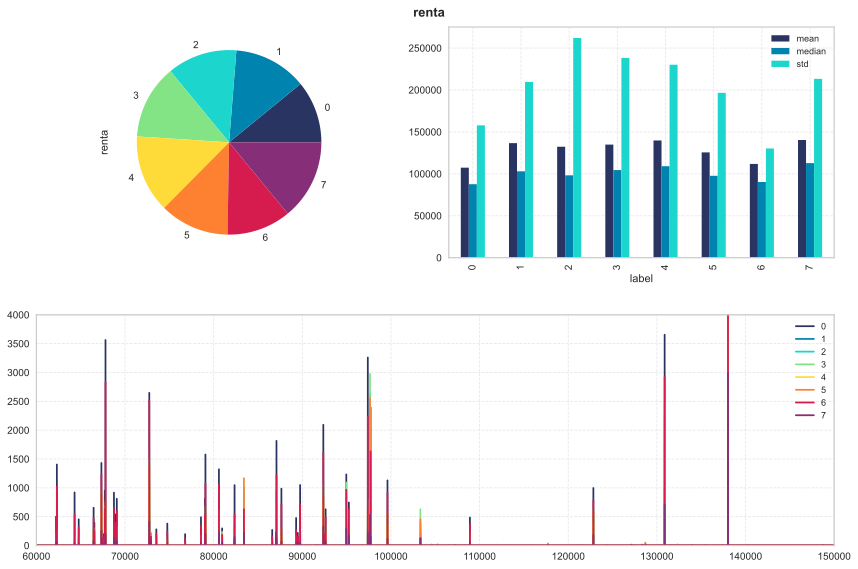

In [95]:
fig, ax = Plot.mosaic([['A', 'B'], ['C', 'C']])

dff.groupby(['label'])['renta'].median().plot.pie(ax=ax['A'])
dff.groupby(['label'])['renta'].agg(['mean', 'median', 'std']).plot.bar(ax=ax['B'])

for l in range(8):
    dff.query(f'label == {l}').groupby(['renta'])['label'].count().plot(ax=ax['C'], label=f'{l}')

ax['C'].set_xlabel('')
ax['C'].set_ylabel('')
ax['C'].set_xlim(60_000, 150_000)
ax['C'].set_ylim(0, 4000)
ax['C'].legend()    
fig.suptitle('renta')

Plot.show()

A renda n√£o se mostrou um atributo descritivo para tra√ßar o perfil dos clientes. Os clientes de todos os clusteres possuem renda m√©dia equivalente, como pode ser observado nos dois primeiros gr√°ficos. O cluster 6 √© o que possui menor desvio padr√£o da m√©dia de renda entre os clientes.

O segundo e terceiro gr√°ficos mostram que os clientes super ricos s√£o outliers e acabam distorcendo os grupos. Al√©m disso, a abordagem de assumir a renda m√©dia da regi√£o como nos clientes com valores nulos de renda, gerou um vi√©s na distribui√ß√£o dos valores. A concentra√ß√£o de pessoas em certos valores de renda mostra esse comportamento. Deste modo, para este classificador, a renda n√£o √© um atributo relevante para identifica√ß√£o do perfil do cluster.

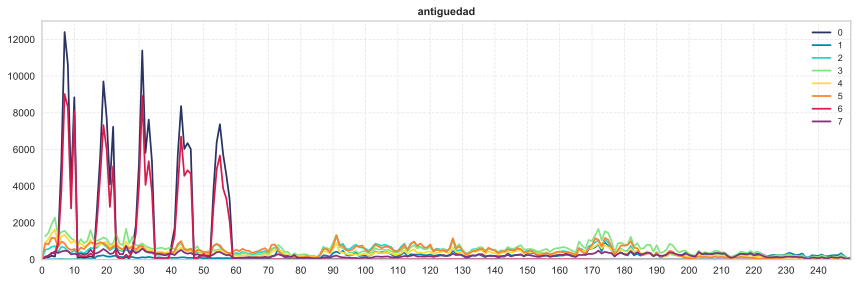

In [96]:
fig, ax = Plot.mosaic([['A', 'A']])

for l in range(8):
    dff.query(f'label == {l}').groupby(['antiguedad'])['label'].count().plot(ax=ax['A'], label=f'{l}')

ax['A'].set_title('antiguedad')
ax['A'].set_xticks(np.arange(0, 250, step=10))
ax['A'].set_xlabel('')
ax['A'].set_ylabel('')
ax['A'].set_xlim(0, 250)
ax['A'].set_ylim(0, 13_000)
ax['A'].legend()

Plot.show()

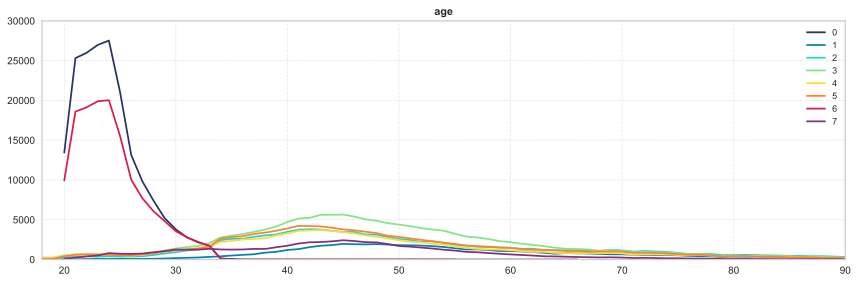

In [97]:
fig, ax = Plot.mosaic([['A', 'A']])

for l in range(8):
    dff.query(f'label == {l}').groupby(['age'])['label'].count().plot(ax=ax['A'], label=f'{l}')
    
ax['A'].set_title('age')
ax['A'].set_xlabel('')
ax['A'].set_ylabel('')
ax['A'].set_xlim(18, 90)
ax['A'].set_ylim(0, 30_000)
ax['A'].legend()

Plot.show()

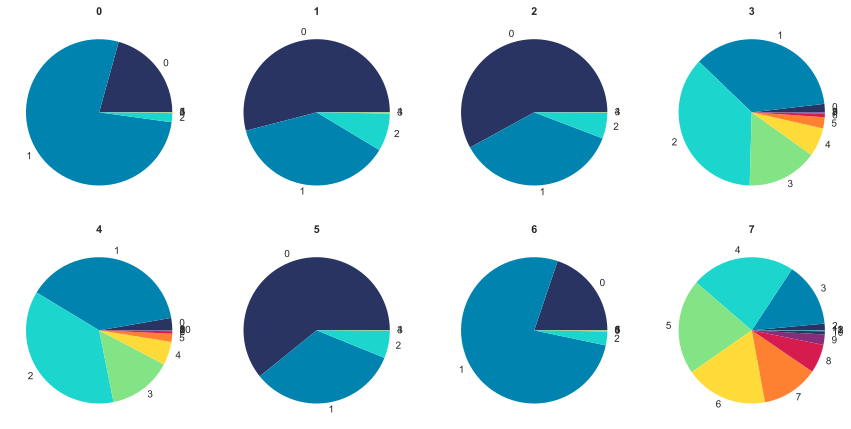

In [98]:
fig, ax = Plot.subplots(2, 4)

for l, ax1 in zip(range(8), ax.flatten()):
    dff.query(f'label == {l}').groupby('num_produtos')['label'].count().plot.pie(ax=ax1)
    ax1.set_title(str(l))
    ax1.set_xlabel('')
    ax1.set_ylabel('')

Plot.show()

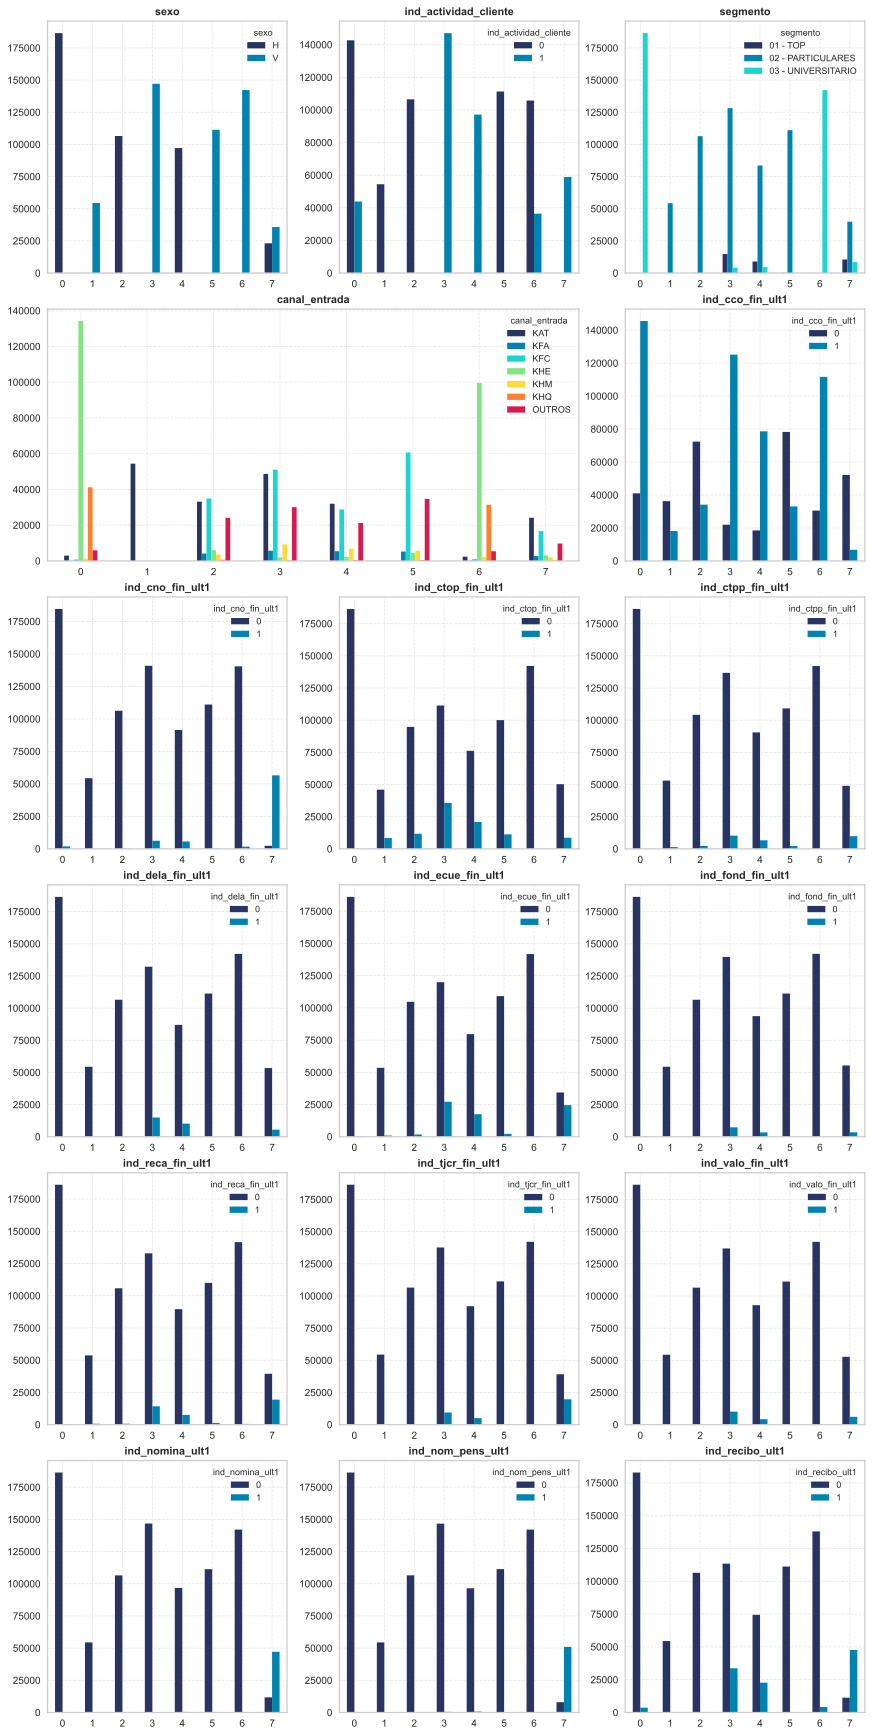

In [99]:
fig, ax = Plot.mosaic([['A', 'C', 'D'], 
                       ['B', 'B', 'E'],
                       ['F', 'G', 'H'],
                       ['I', 'J', 'K'],
                       ['L', 'M', 'N'],
                       ['O', 'P', 'Q'],                       
                      ])

for pos, atributo in atributos.items():
    dff.groupby(['label', atributo])['label'].count().unstack().plot.bar(rot=0, ax=ax[pos])
    ax[pos].set_title(atributo)
    ax[pos].set_xlabel('')
    ax[pos].set_ylabel('')

## An√°lise do perfil de cada cluster

### Cluster 0

- Este cluster √© o mais numeroso, composto por 186.524 clientes. 
- Todas as pessoas s√£o do sexo H na faixa dos 20 e 30 anos todos do segmento universit√°rio.
- S√£o clientes com contrato entre 5 e 55 meses. 
- Na sua maioria s√£o pouco ativos com 0 ou 1 produtos do banco. 
- Os principais canais de entrada s√£o KHE e KHQ.
- Majoritariamente possuem apenas Conta Corrente.
- S√£o a maioria dos clientes nas seguintes cidades: RIOJA, LA, BARCELONA, ZARAGOZA, SEVILLA, PALMAS, LAS, ASTURIAS, LERIDA, TARRAGONA, AVILA, VALLADOLID, CORU√ëA, A, BALEARS, ILLES, PONTEVEDRA, VALENCIA, CADIZ, MURCIA, CUENCA, ALBACETE, ALICANTE, MALAGA, GRANADA, TOLEDO, CORDOBA, BADAJOZ, BURGOS, CASTELLON, SALAMANCA, LUGO, HUELVA, CIUDAD REAL, GUADALAJARA, GIRONA, SEGOVIA, CACERES, HUESCA, ZAMORA, PALENCIA, SORIA, OURENSE, TERUEL.


### Cluster 1

- Este cluster √© um dos menos numerosos, composto por 54.436 clientes. 
- Todas as pessoas s√£o do sexo V na faixa dos 40 e 60 anos todos do segmento particular.
- No geral, possuem contratos com mais de 70 meses.
- N√£o s√£o clientes ativos e possuem de 0 a 2 produtos do banco. 
- O √∫nico canal usado √© o KAT.
- Poucos possuem Conta Corrente ou Conta Particular

### Cluster 2

- Todas as pessoas s√£o do sexo H na faixa dos 30 e 70 anos todos do segmento particular.
- N√£o s√£o clientes ativos e possuem de 0 a 2 produtos do banco. 
- Os principais canais de entrada s√£o KAT, KFC e OUTROS.
- Poucos possuem Conta Corrente ou Conta Particular

### Cluster 3

- Este cluster √© segundo mais numeroso, composto por 147.115 clientes.
- Todas as pessoas s√£o do sexo V na faixa dos 40 e 60 anos do segmento particular, embora poucos clientes sejam de outros segmentos.
- S√£o clientes ativos e possuem de 1 a 5 produtos do banco. 
- Os principais canais de entrada s√£o KAT, KFC e OUTROS.
- Possuem grande variedade de produtos, como Conta Corrente, Conta Particular, D√©bito Direto, T√≠tulos, Cart√£o de cr√©dito, Impostos, e-Account, Fundos, D√©posito Longo-Prazo, Conta Sal√°rio. 
- S√£o a maioria dos clientes nas seguintes cidades: MADRID, BIZKAIA, CEUTA, LEON, GIPUZKOA, CANTABRIA, JAEN, ALAVA, SANTA CRUZ DE TENERIFE, ALMERIA, MELILLA

### Cluster 4

- Todas as pessoas s√£o do sexo H na faixa dos 30 e 60 anos do segmento particular, embora poucos clientes sejam de outros segmentos.
- S√£o clientes ativos e possuem de 1 a 5 produtos do banco. 
- Os principais canais de entrada s√£o KAT, KFC e OUTROS.
- Possuem grande variedade de produtos, como Conta Corrente, Conta Particular, D√©bito Direto, T√≠tulos, Cart√£o de cr√©dito, Impostos, e-Account, Fundos, D√©posito Longo-Prazo, Conta Sal√°rio. 
- Este cluster √© bem similar ao cluster 3.

### Cluster 5

- Todas as pessoas s√£o do sexo V na faixa dos 30 e 60 anos do segmento particular.
- N√£o s√£o clientes ativos e possuem de 0 a 2 produtos do banco. 
- Os principais canais de entrada s√£o KFC e OUTROS.
- Possuem Conta Corrente ou Conta Particular
- S√£o a maioria dos clientes da cidade de NAVARRA
- Similar ao cluster 2

### Cluster 6

- Todas as pessoas s√£o do sexo V na faixa dos 20 e 30 anos do segmento universit√°rio.
- Cerca de 25% dos clientes s√£o ativos e possuem de 0 a 1 produto do banco. 
- Os principais canais de entrada s√£o KHE e KHQ.
- Possuem Conta Corrente ou D√©bito Direto.

### Cluster 7

- S√£o clientes de ambos os sexos na faixa dos 25 e 60 anos do segmento particular, embora poucos clientes sejam de outros segmentos.
- S√£o clientes com contrato entre 5 e 55 meses. 
- S√£o clientes ativos e possuem de 3 a 9 produtos do banco. 
- Os principais canais de entrada s√£o KAT, KFC e OUTROS.
- Quase a totalidade dos clientes possui Conta Sal√°rio, Pens√£o, Folha de pagamento, D√©bito direto. Os clientes tamb√©m possuem outros produtos, por√©m, mais distribu√≠do entre os clientes.